<a href="https://colab.research.google.com/github/rjsgk5792/AI_12th_project/blob/main/Stockx_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do List Memo

* 신발 이름 split -> 인코딩 -> 머신러닝 모델 학습
* 다른 머신러닝 모델들 적용
* Test데이터 혹은 Kream 크롤링 데이터의 트랜드 분석

[수행된 사항]
- 2017-2019년 Stockx 신발 트랜드 분석 
- 모델 학습을 위한 train/test 데이터 전처리
- 베이스라인 모델 예측 수행

[수행될 사항]
- 발표 혹은 보고서에 담을 트랜드 분석 추가 시행 (Test데이터, Kream크롤링 데이터 포함)
- 추가적인 Feature Engineering으로 모델 성능 향상 (신발 이름 컬럼 공백기준 Split 등)
- 다른 모델 역할 분담해서 사용 및 근거정리

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [49]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [50]:
train = pd.read_csv("/content/drive/MyDrive/부트캠프/cp1/StockX-Data-Contest-2019-3.csv")
test = pd.read_csv("/content/drive/MyDrive/부트캠프/cp1/sneakers_test.csv")

print(train.shape)
print(test.shape)

(99956, 8)
(1000, 17)


In [51]:
df = train.copy()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [53]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


# Data Cleaning

## 텍스트 전처리

In [54]:
# 신발 이름에서 - 제거

df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-',' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2/11/17,11.0,Rhode Island


In [55]:
# Price 에서 [$ ,] 제거

df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace('$',''))
df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace(',',''))

df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace('$',''))
df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace(',',''))

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island


## 데이터 타입 변경

In [56]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [57]:
# 주문 일자, Release Date

df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y')
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [58]:
# 판매가, 소매가 object -> numerical 데이터 타입 변경

target_col = ['Sale Price','Retail Price']

for col in target_col:
  df[col] = pd.to_numeric(df[col])

print(df.dtypes)
df.head()

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


# Feature Engineering
* 추후에 달러와 인치 변환?

## 1. 판매가와 소매가 비교 컬럼 생성

In [59]:
df['Cheaper Buy'] = df['Sale Price'] < df['Retail Price']
df['Same Buy'] = df['Sale Price'] == df['Retail Price']
df['Expensive Buy'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True


## 2. 상품 출시일과 판매된 날짜(주문일) 차이 컬럼 생성

In [60]:
df['time gap'] = df['Order Date']-df['Release Date']
df['time gap'] = df['time gap'].apply(lambda x: str(x).split(' ')[0])
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202


## 3. 미국 도시 -> 큰 범주로 분류 컬럼

In [61]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

In [62]:
East = ['Kentucky','Rhode Island','Michigan','New York','New Jersey','North Carolina'
          ,'Delaware','Virginia','Massachusetts','Pennsylvania','Ohio','Connecticut','Maine','Illinois'
          ,'Maryland','Tennessee','West Virginia','Indiana','New Hampshire','Vermont',]
West = ['California','Oregon','Washington','Nevada','Arizona','Wyoming','Utah','District of Columbia','Idaho']
South = ['Texas','Alabama','Florida','Louisiana','Georgia','Oklahoma','South Carolina','Arkansas','New Mexico'
          ,'Mississippi']
North = ['Wisconsin','Minnesota','North Dakota','Montana']
central = ['Kansas','Colorado','Nebraska','Missouri','Iowa','South Dakota']
etc = ['Alaska','Hawaii']

In [63]:
df['cardinal point'] = [None] * len(df)

for i in range(len(df)):
  if df['Buyer Region'][i] in East:
    df['cardinal point'][i] = 'East'
  elif df['Buyer Region'][i] in West:
    df['cardinal point'][i] = 'West'
  elif df['Buyer Region'][i] in South:
    df['cardinal point'][i] = 'South'
  elif df['Buyer Region'][i] in North:
    df['cardinal point'][i] = 'North'
  elif df['Buyer Region'][i] in central:
    df['cardinal point'][i] = 'Central'
  elif df['Buyer Region'][i] in etc:
    df['cardinal point'][i] = 'etc'
  else:
    df['cardinal point'][i] = 'error'  

In [64]:
df['cardinal point'].value_counts()

East       46530
West       31949
South      16641
Central     2714
North       1678
etc          444
Name: cardinal point, dtype: int64

## 출시가 대비 몇배의 차익을 발생시켰는지

In [65]:
df['multiple_return'] = (df['Sale Price']/df['Retail Price'])
df['multiple_return'] = df['multiple_return'].round(1)

## 이상치 처리

In [66]:
# 판매가 1000초과 이상치 처리
df.drop(df.loc[df['Sale Price']>1000].index, inplace=True)
df = df.reset_index(drop = True)
# time gap 800초과 이상치 처리
df['time gap'] = df['time gap'].astype('int')
df.drop(df.loc[df['time gap']<0].index, inplace=True)
df.drop(df.loc[df['time gap']>800].index, inplace=True)
df = df.reset_index(drop = True)

df.shape

(91589, 14)

In [67]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.1
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,3.8
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,2017-02-11,8.5,Michigan,False,False,True,202,East,3.6
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,784,220,2016-12-17,11.0,California,False,False,True,258,West,3.6


                 Sale Price  Retail Price  Shoe Size  Cheaper Buy  Same Buy  \
Sale Price         1.000000     -0.375816   0.083474    -0.089782 -0.065913   
Retail Price      -0.375816      1.000000  -0.050994     0.031974  0.024580   
Shoe Size          0.083474     -0.050994   1.000000    -0.002399 -0.000295   
Cheaper Buy       -0.089782      0.031974  -0.002399     1.000000 -0.004704   
Same Buy          -0.065913      0.024580  -0.000295    -0.004704  1.000000   
Expensive Buy      0.111603     -0.040422   0.002085    -0.791001 -0.608087   
time gap          -0.146276      0.254138   0.020739     0.051186  0.054131   
multiple_return    0.927831     -0.674969   0.081102    -0.076604 -0.057478   

                 Expensive Buy  time gap  multiple_return  
Sale Price            0.111603 -0.146276         0.927831  
Retail Price         -0.040422  0.254138        -0.674969  
Shoe Size             0.002085  0.020739         0.081102  
Cheaper Buy          -0.791001  0.051186        

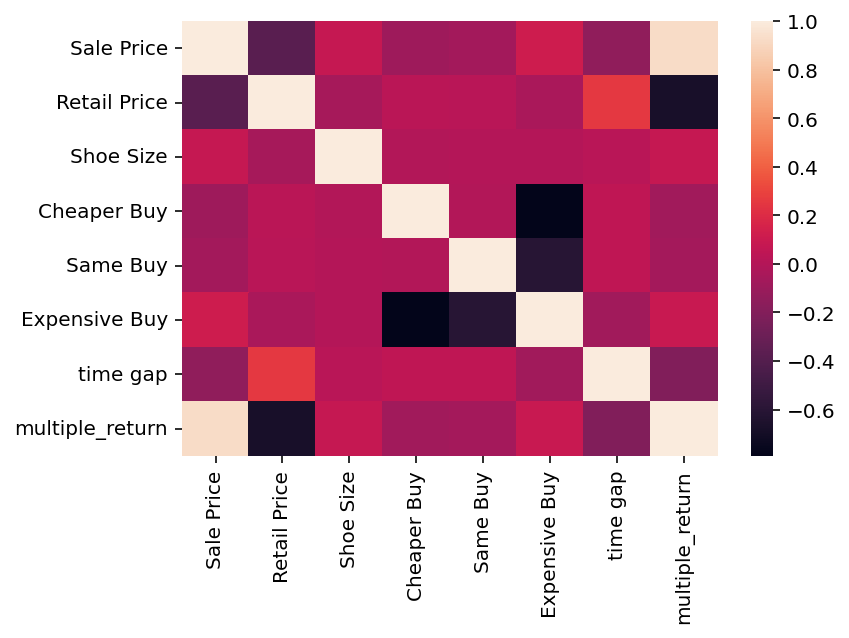

In [68]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations)

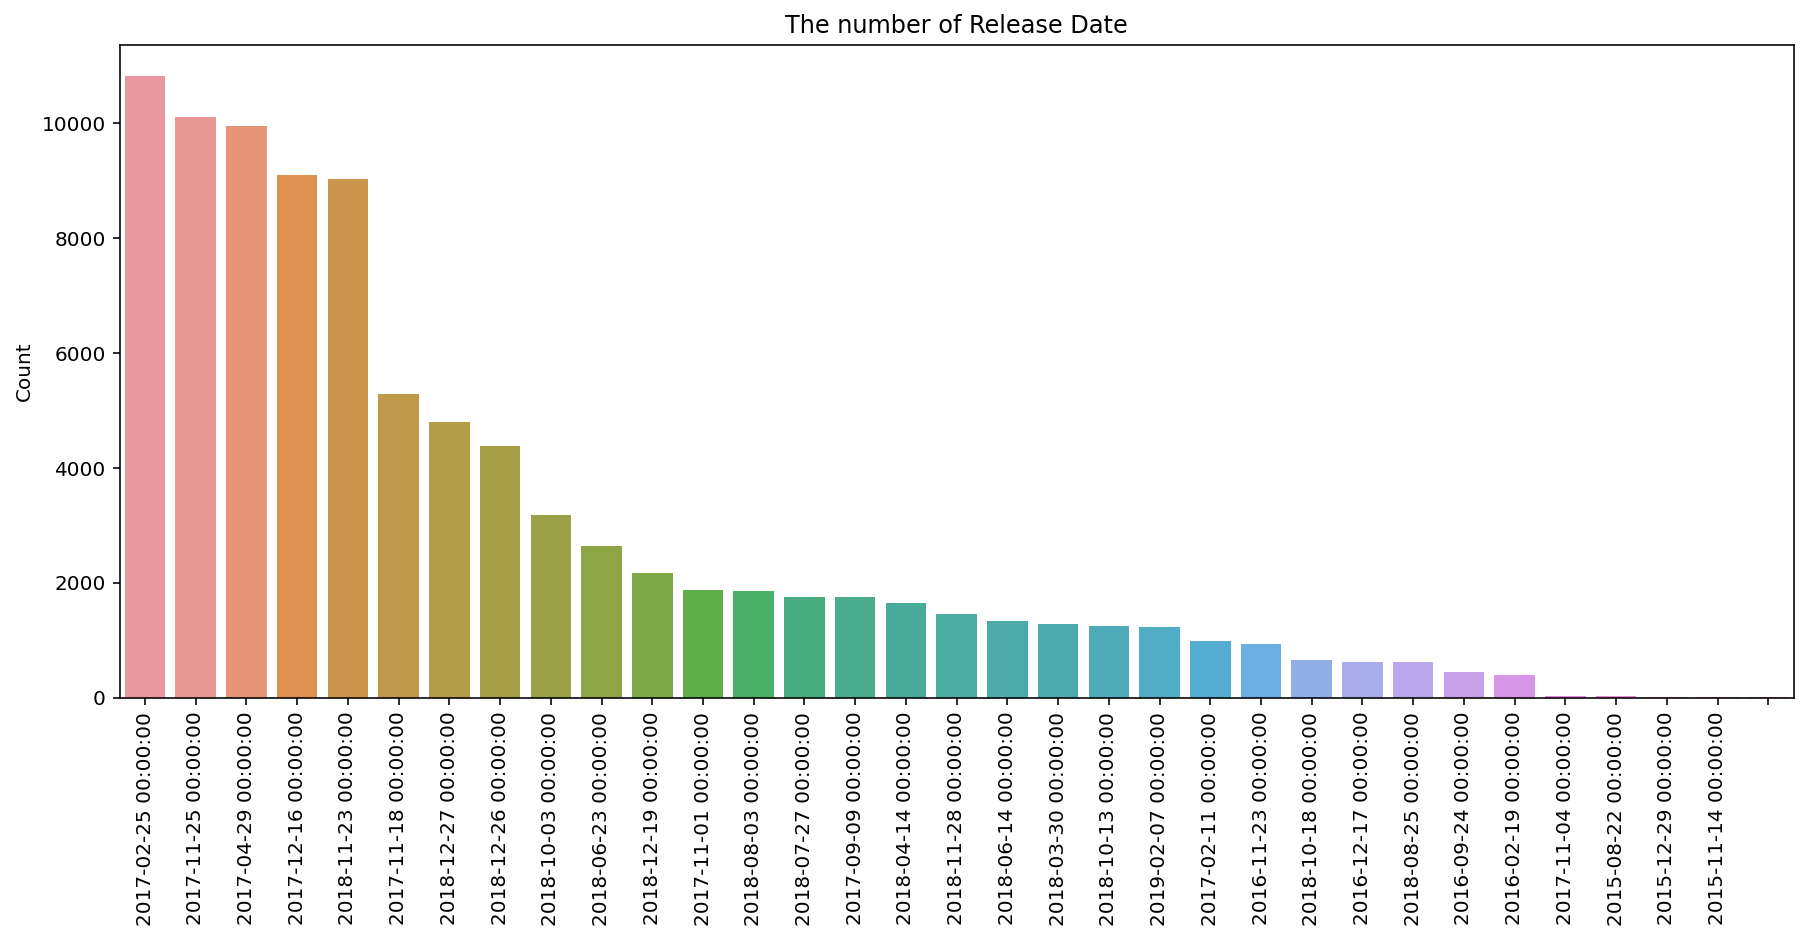

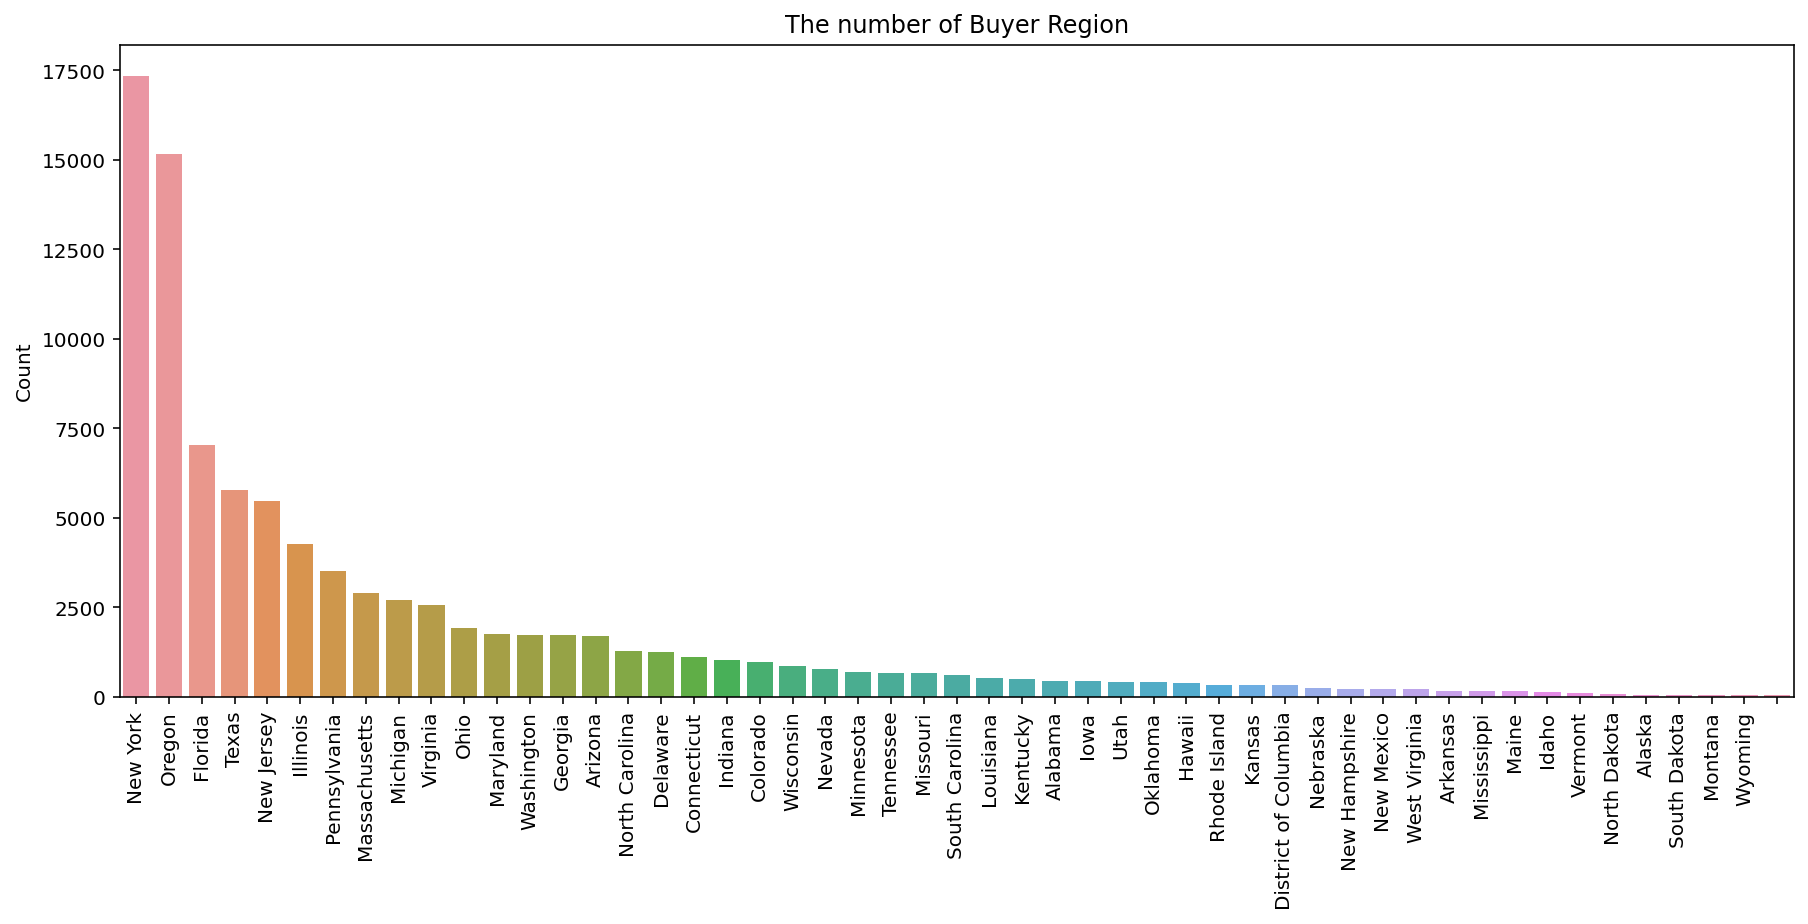

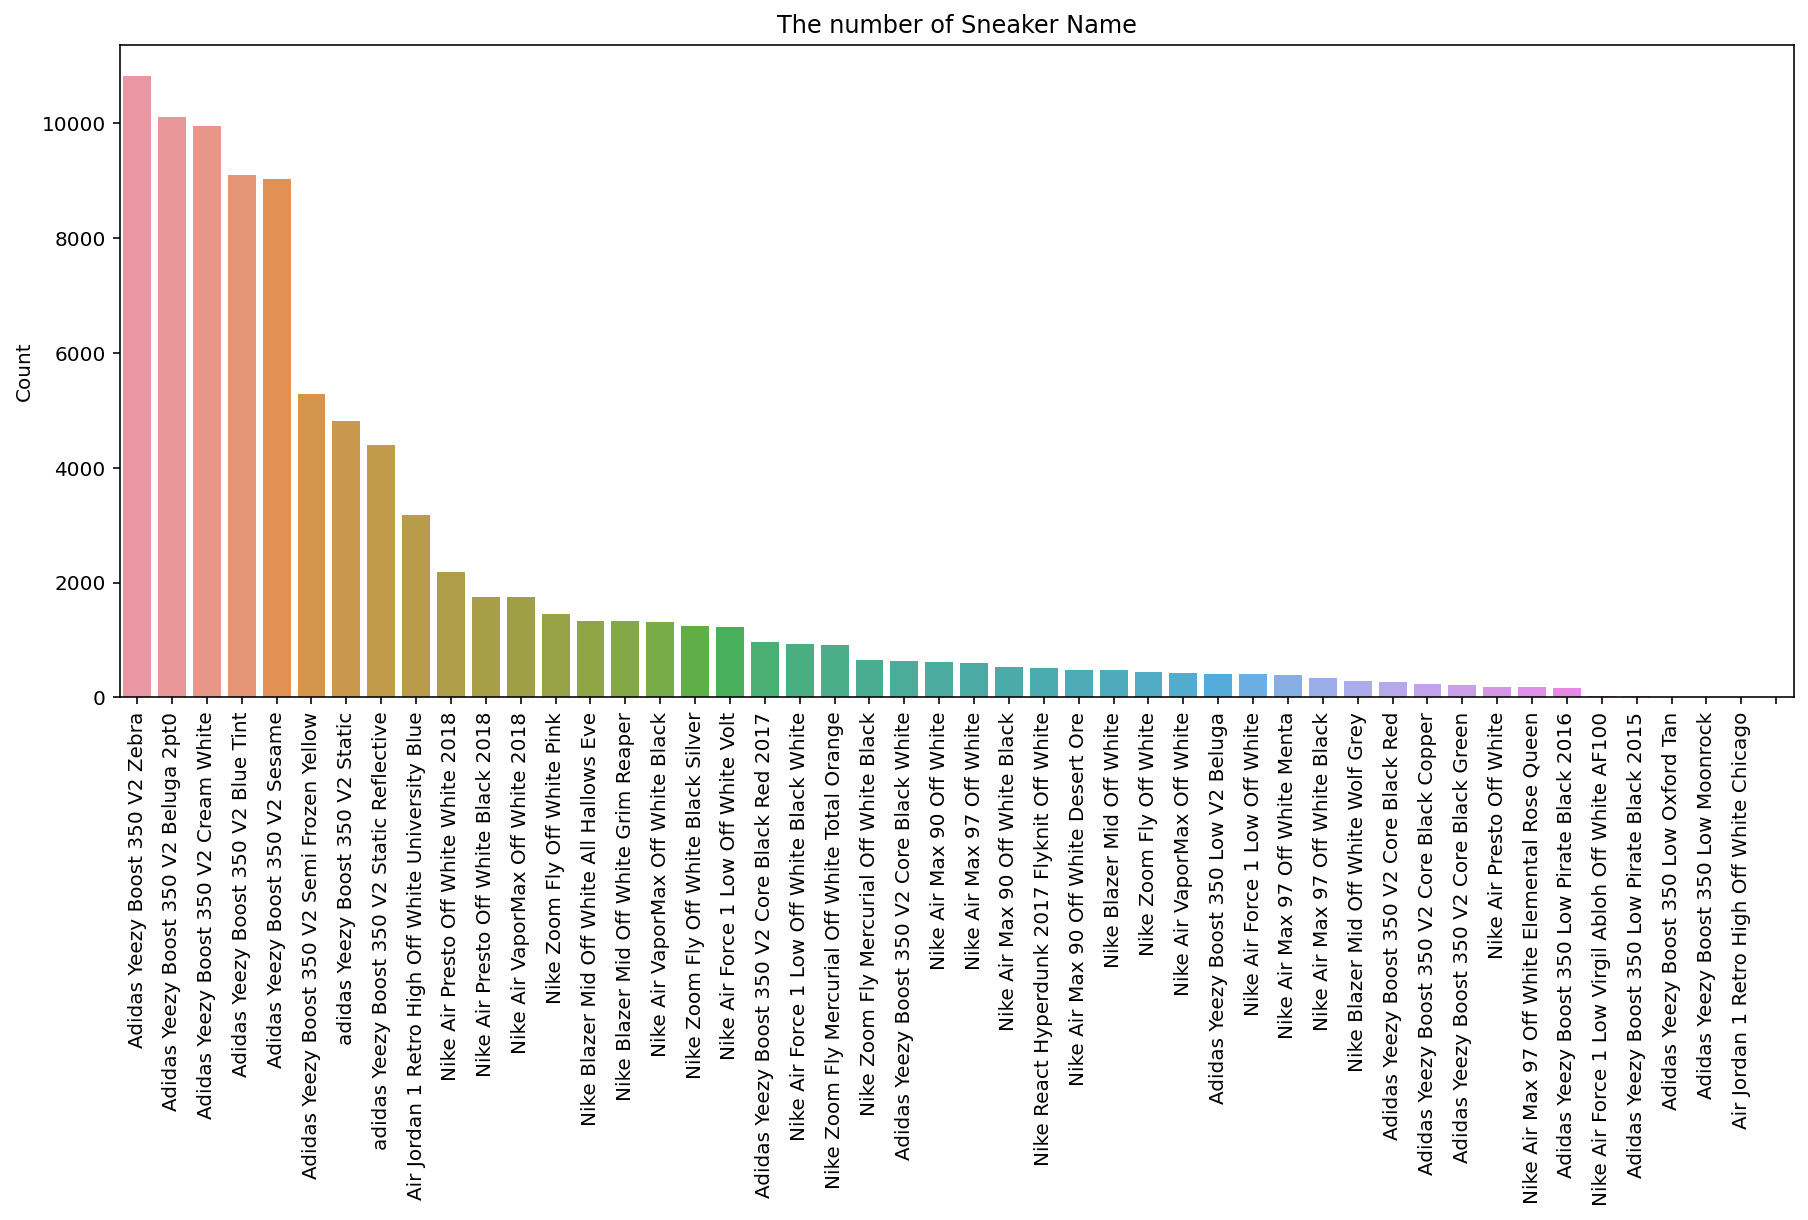

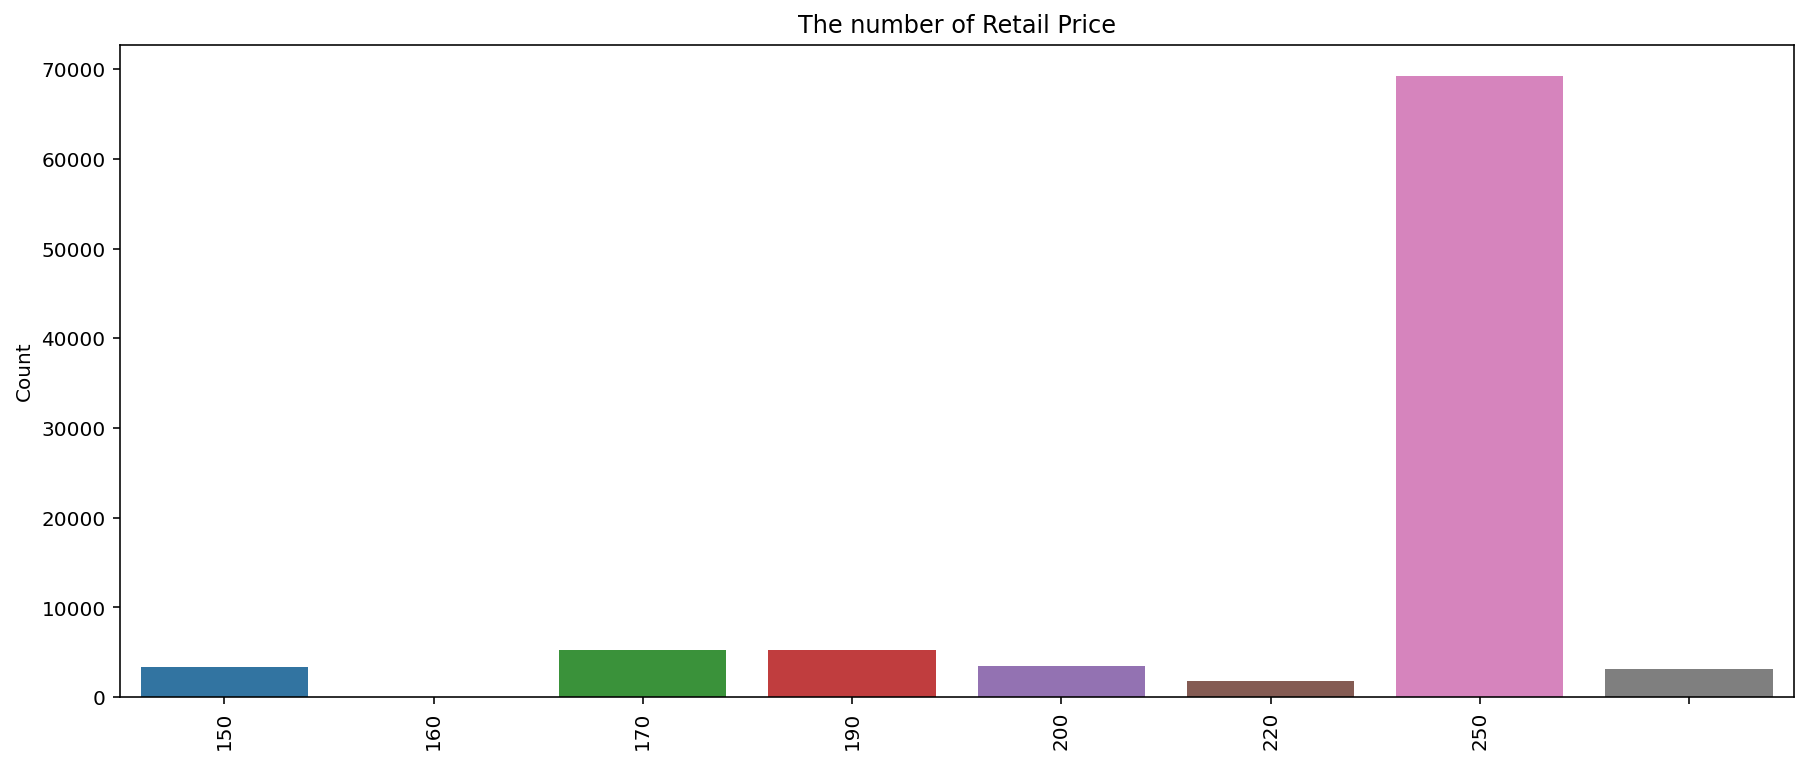

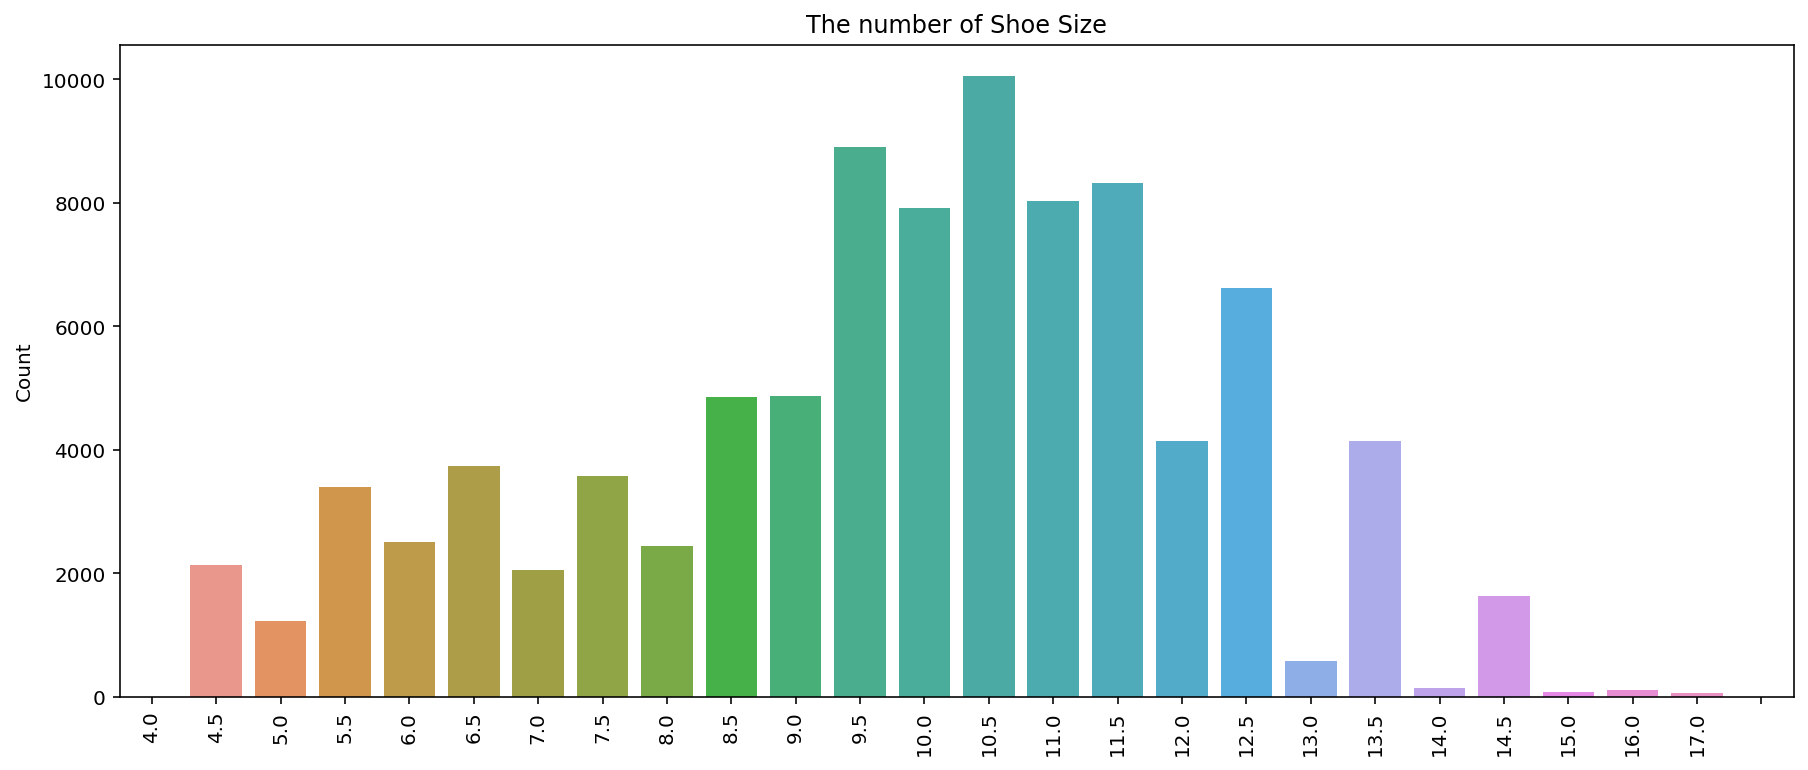

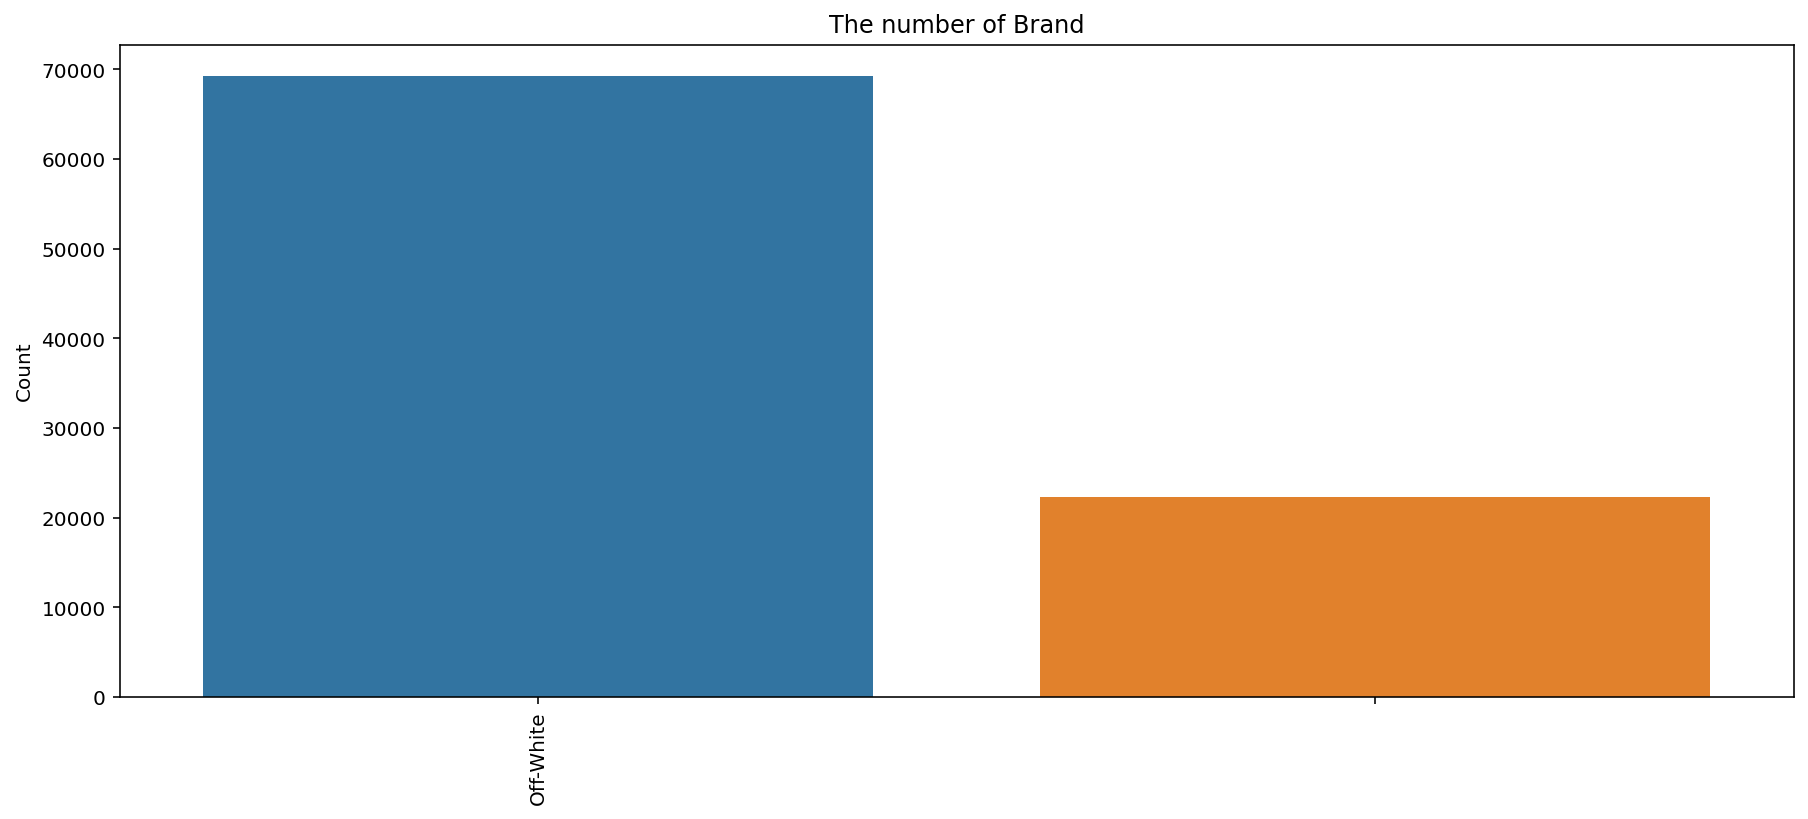

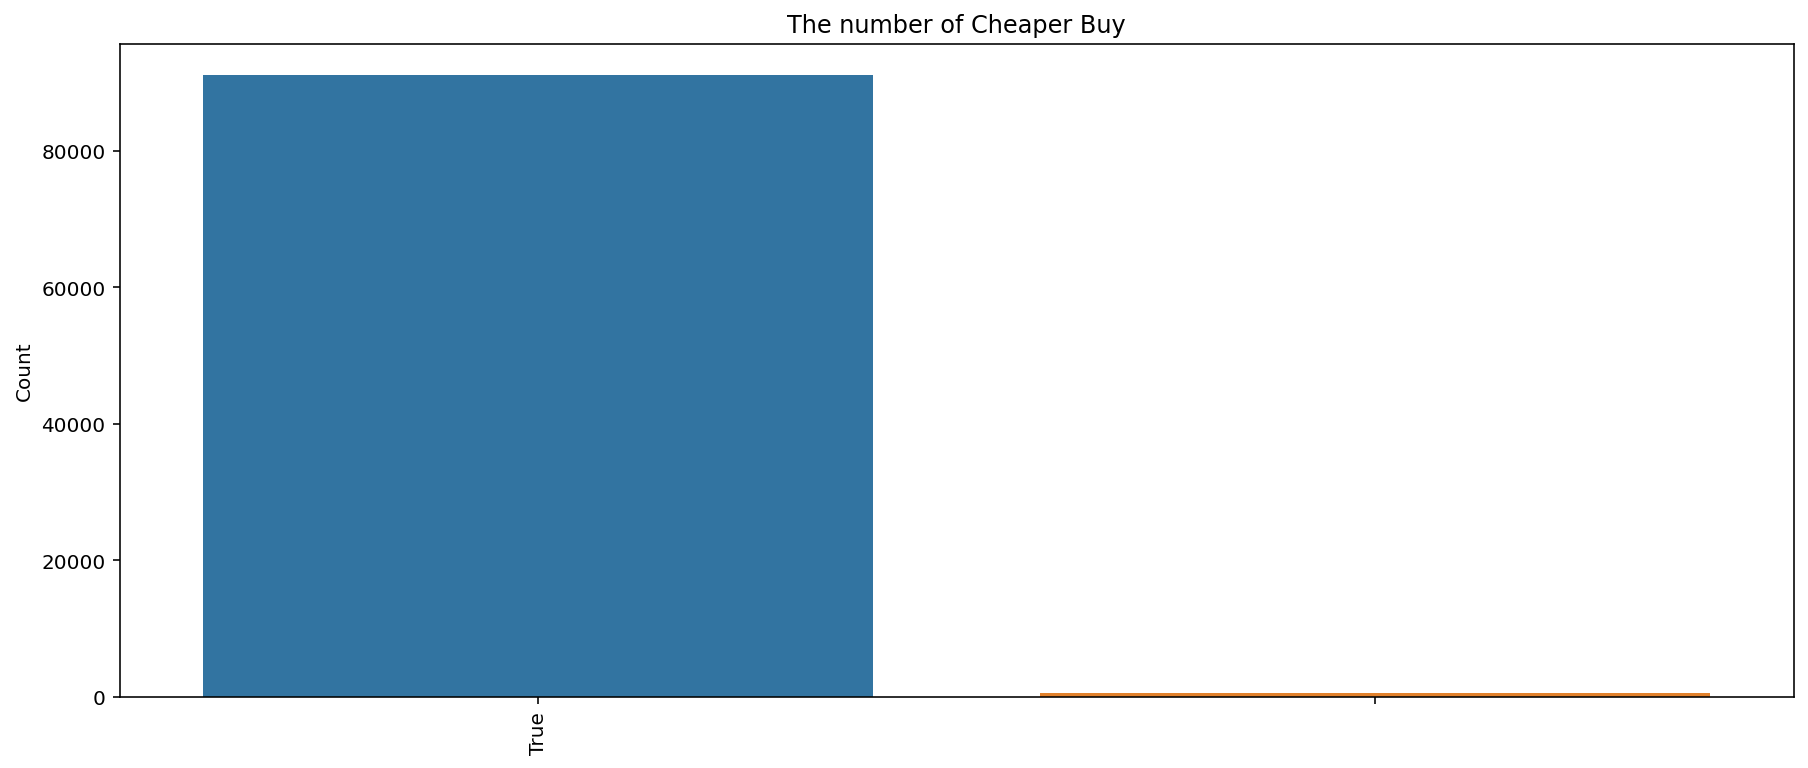

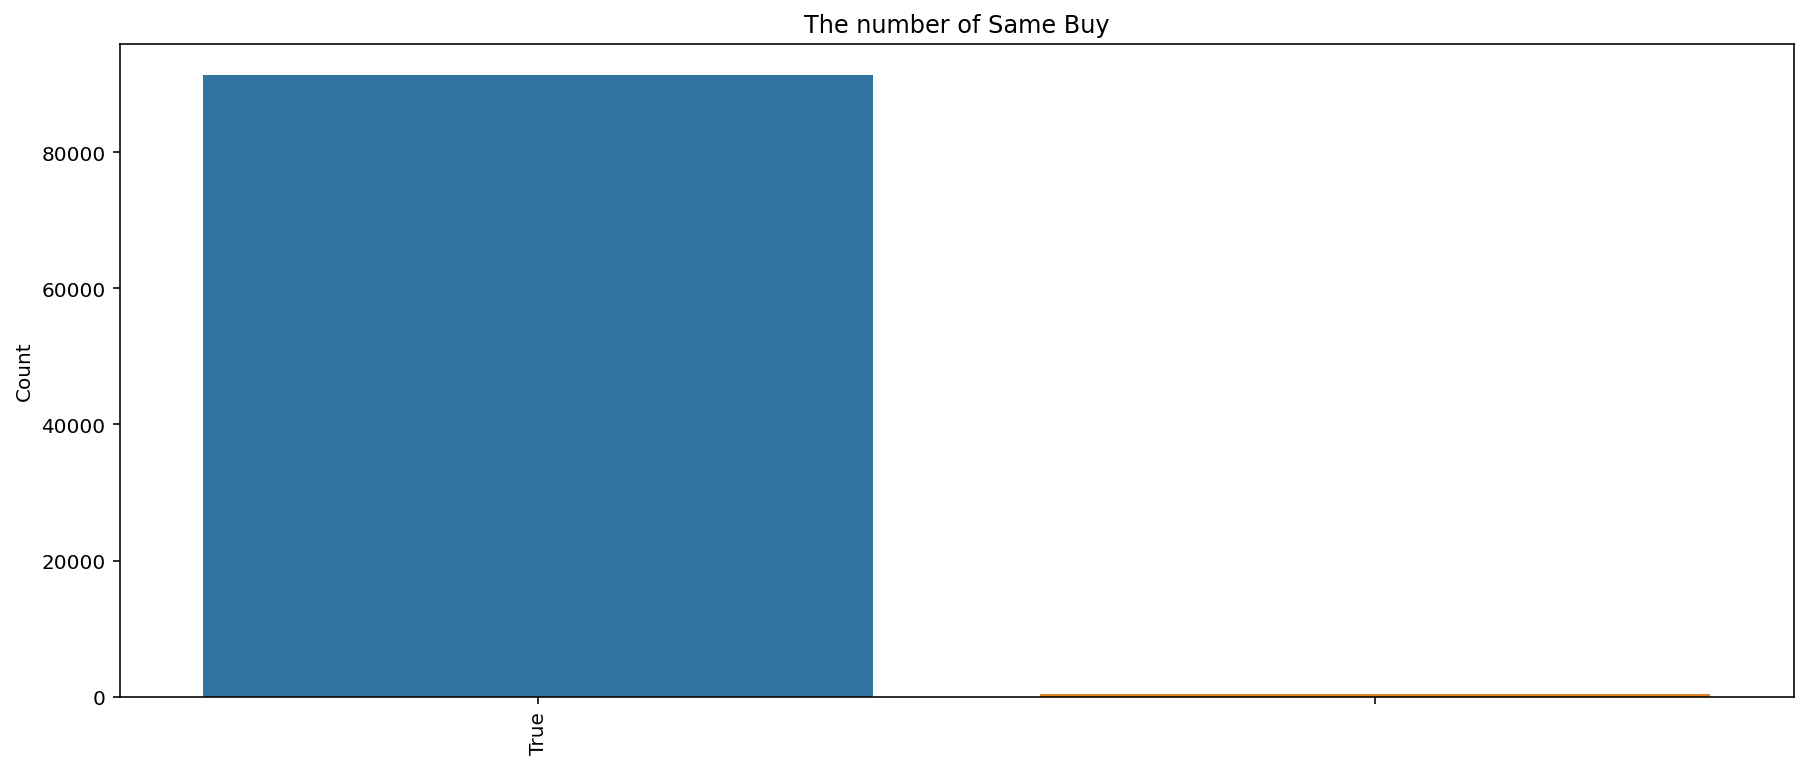

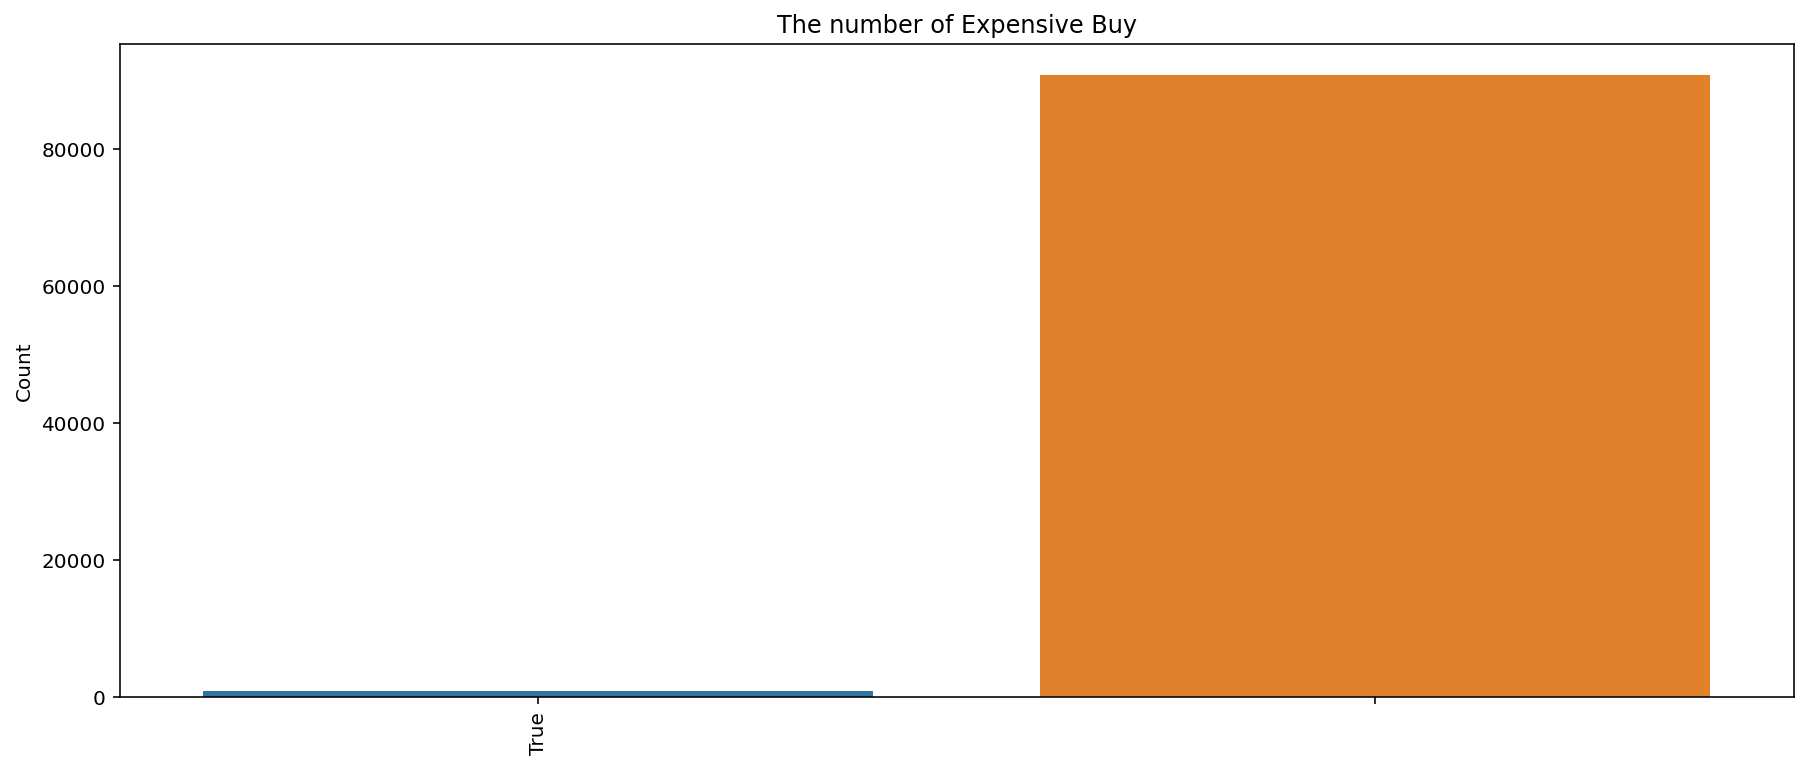

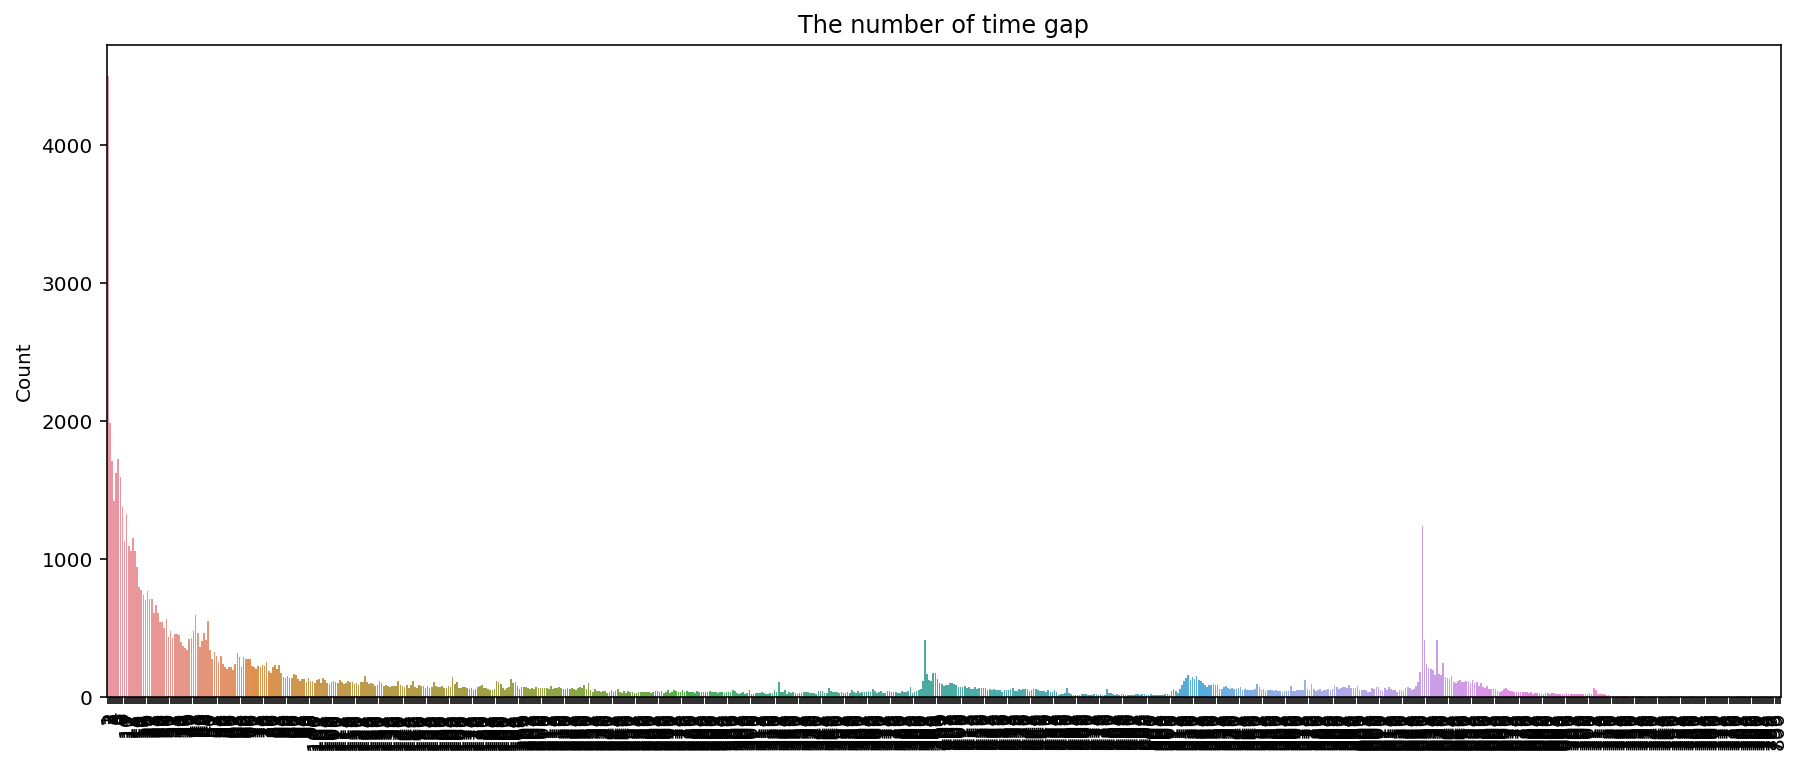

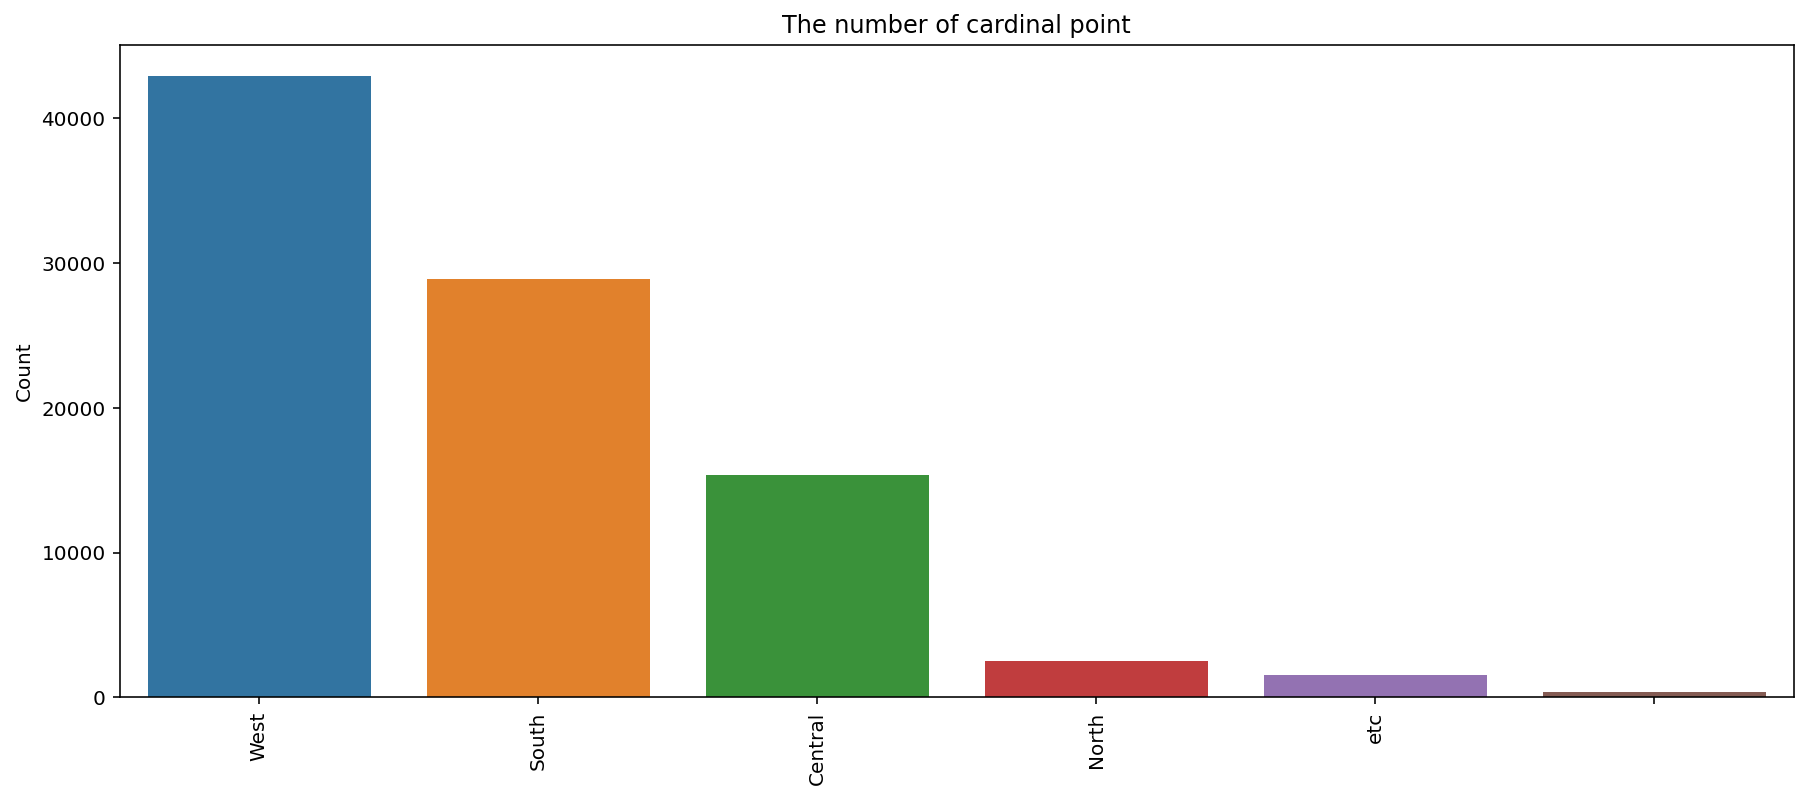

In [69]:
df_cate = ['Release Date','Buyer Region','Sneaker Name',
          'Retail Price','Shoe Size','Brand','Cheaper Buy','Same Buy',
          'Expensive Buy','time gap','cardinal point']

for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

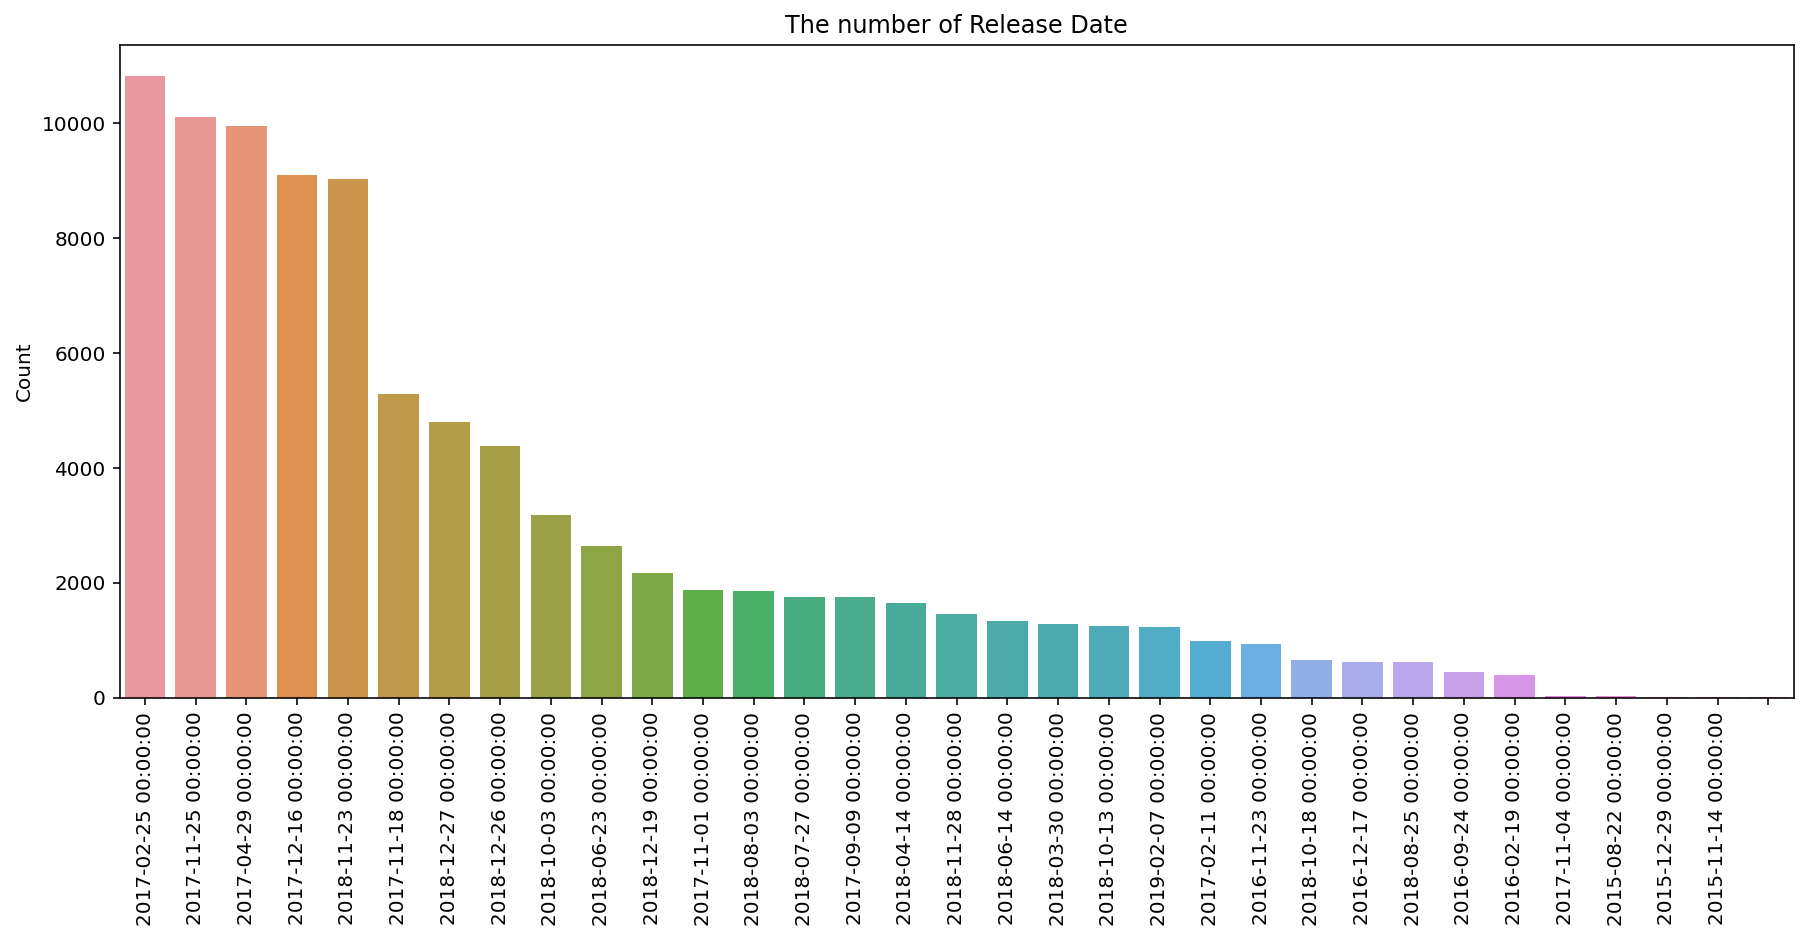

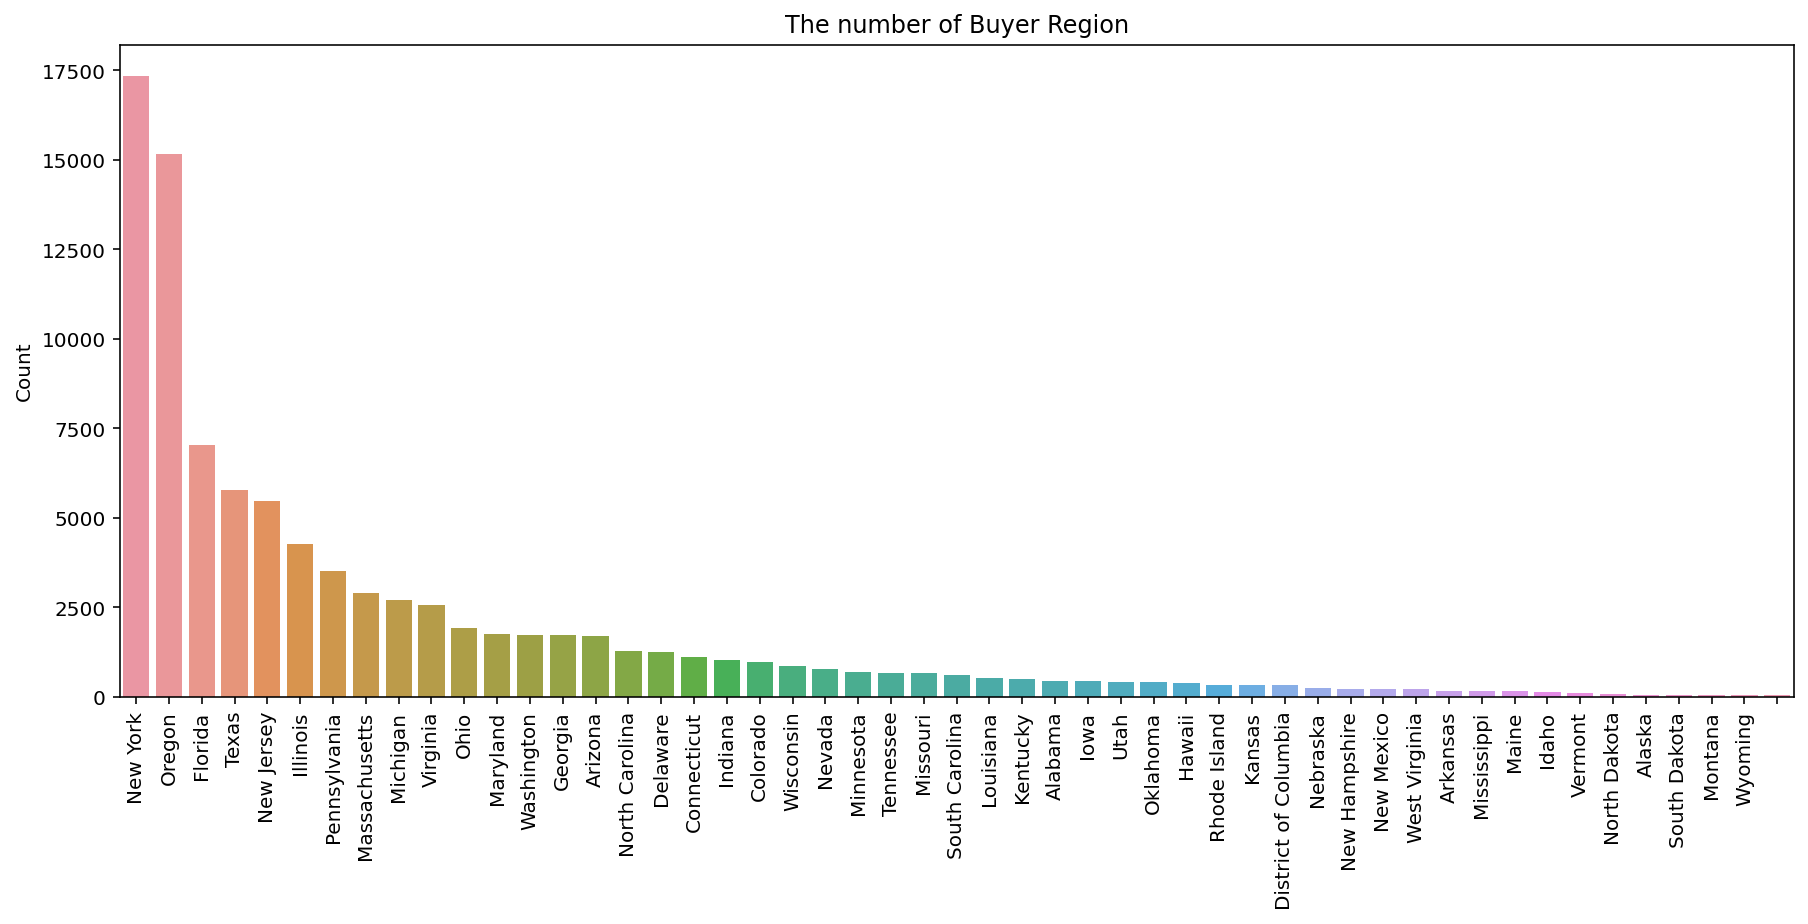

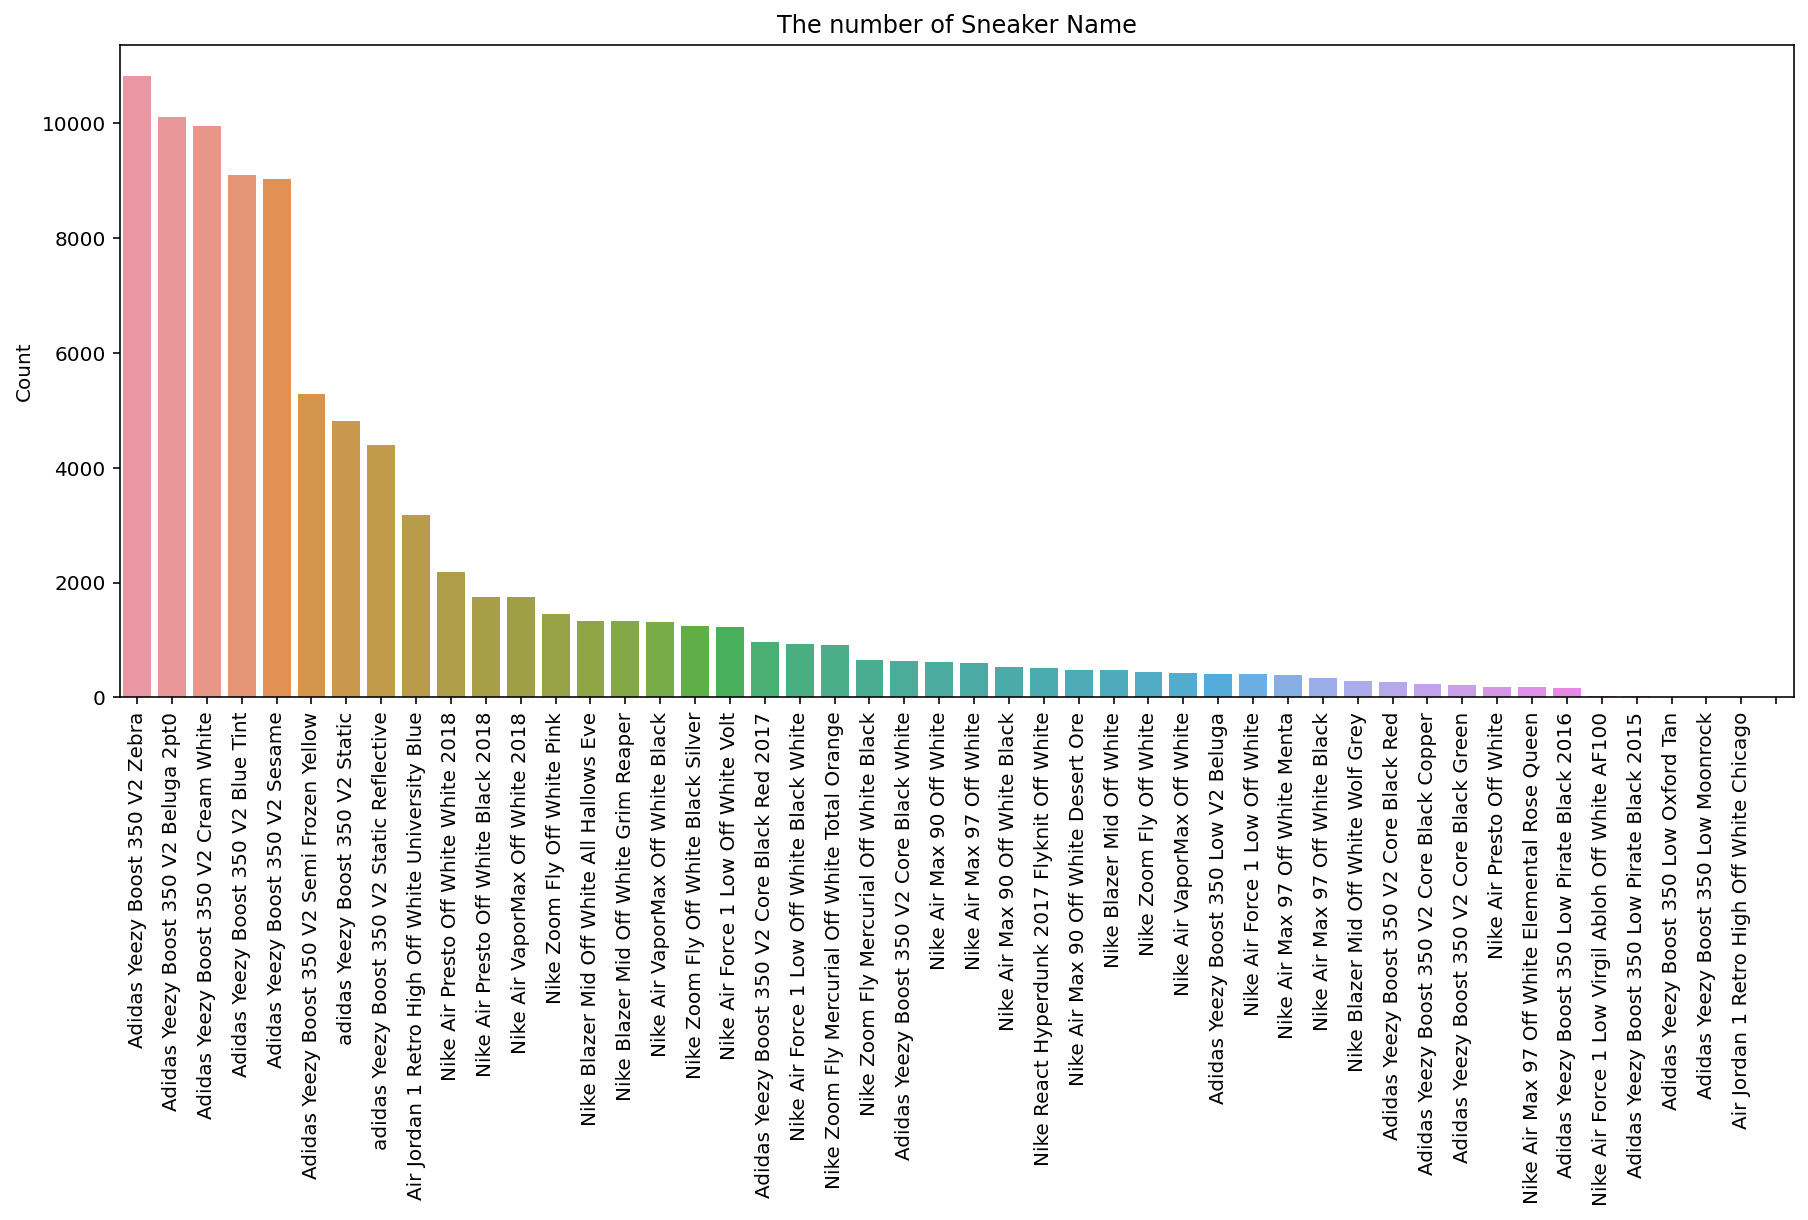

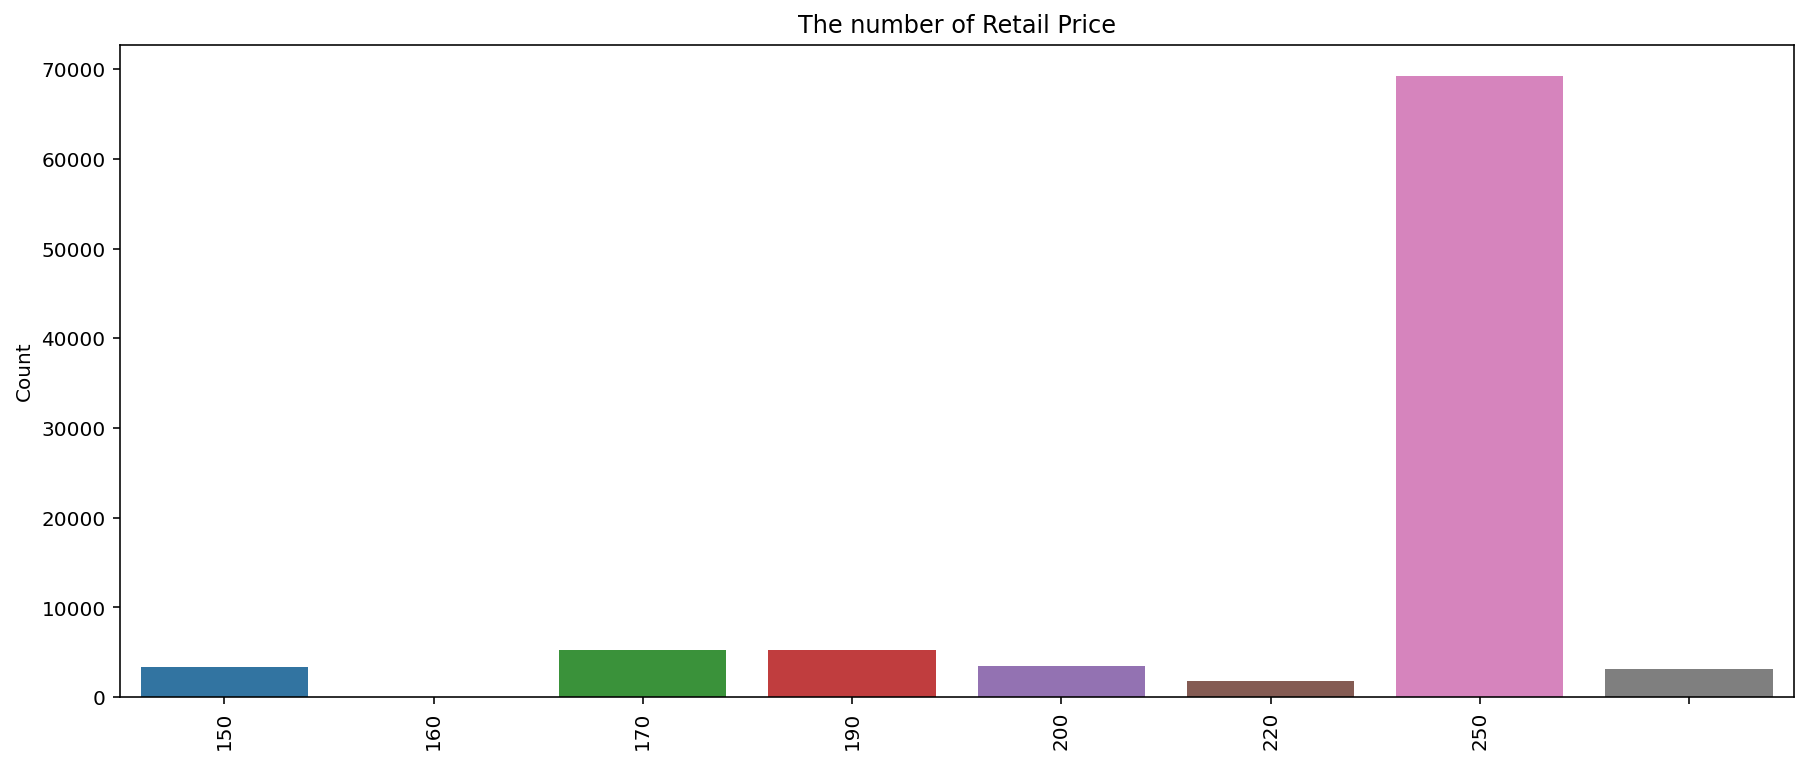

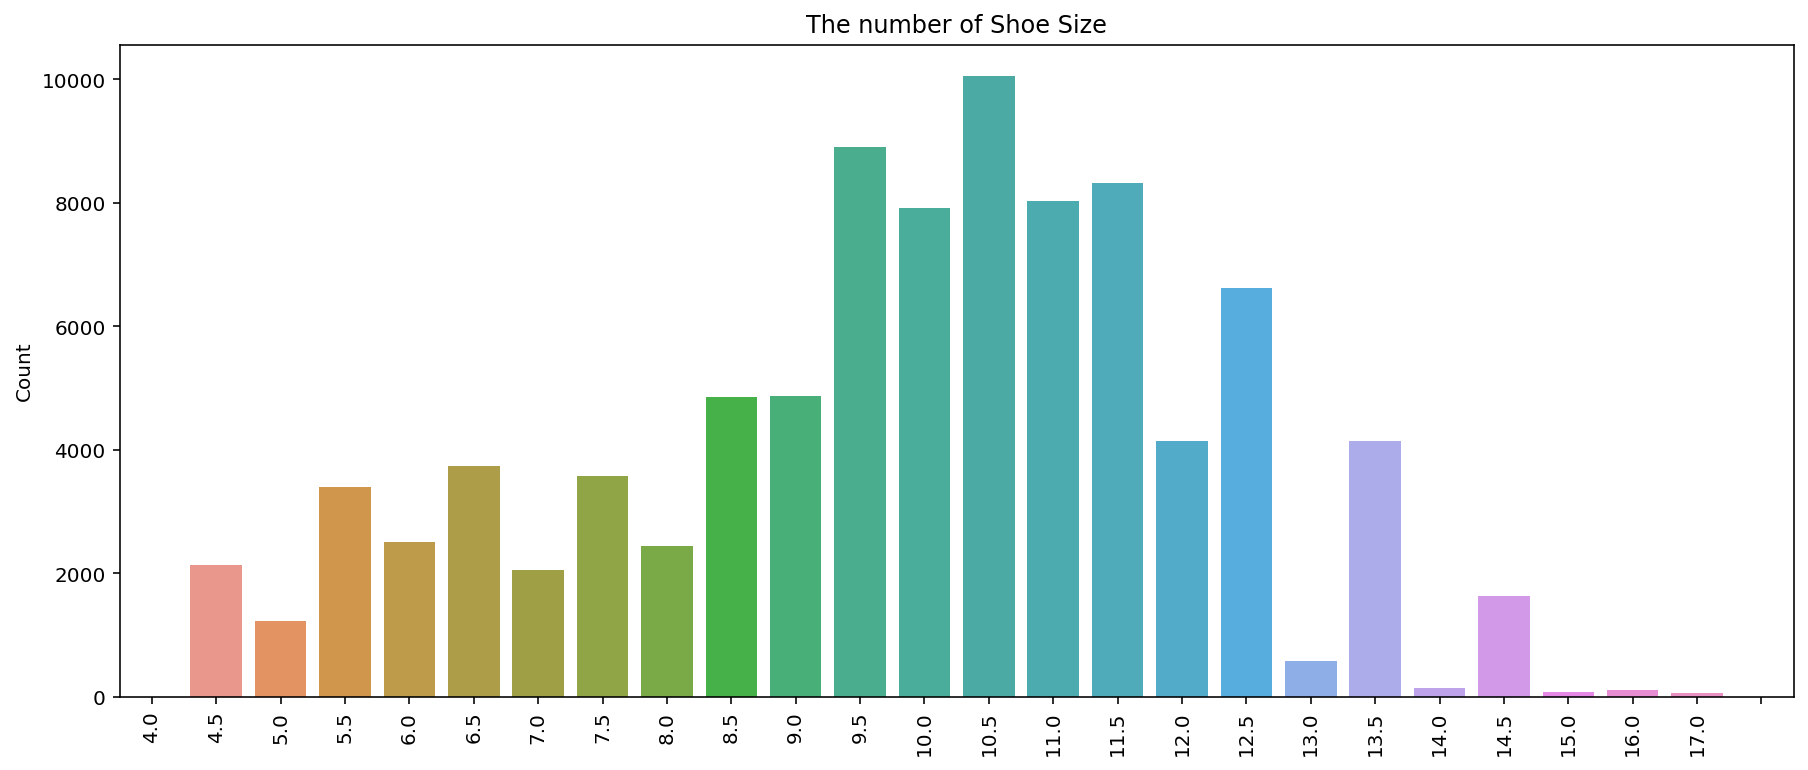

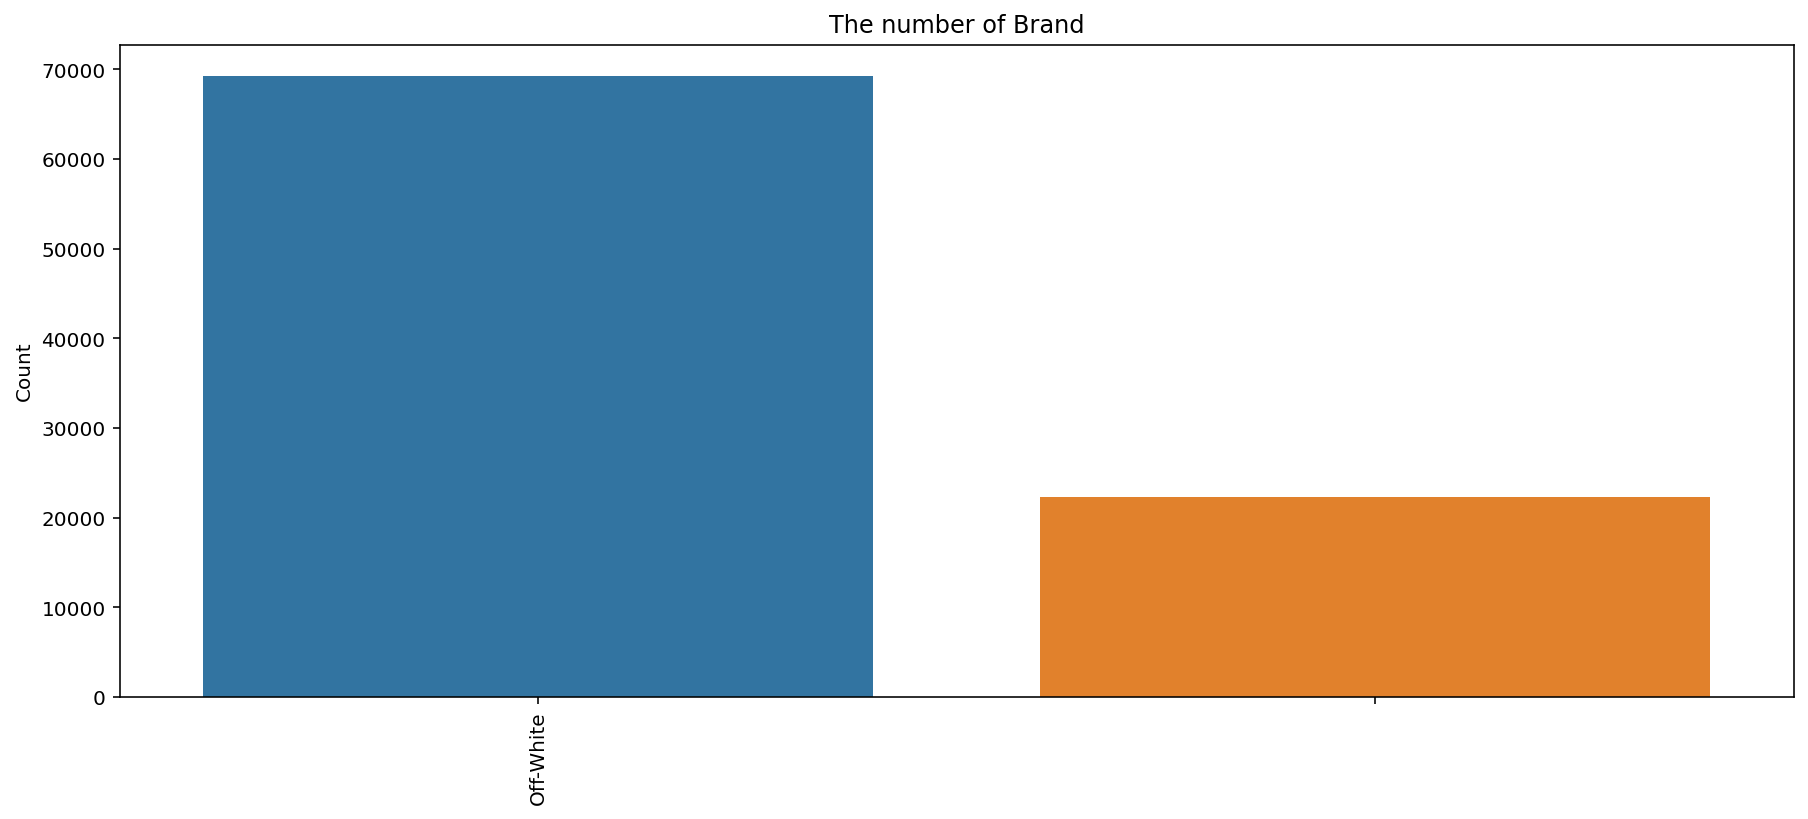

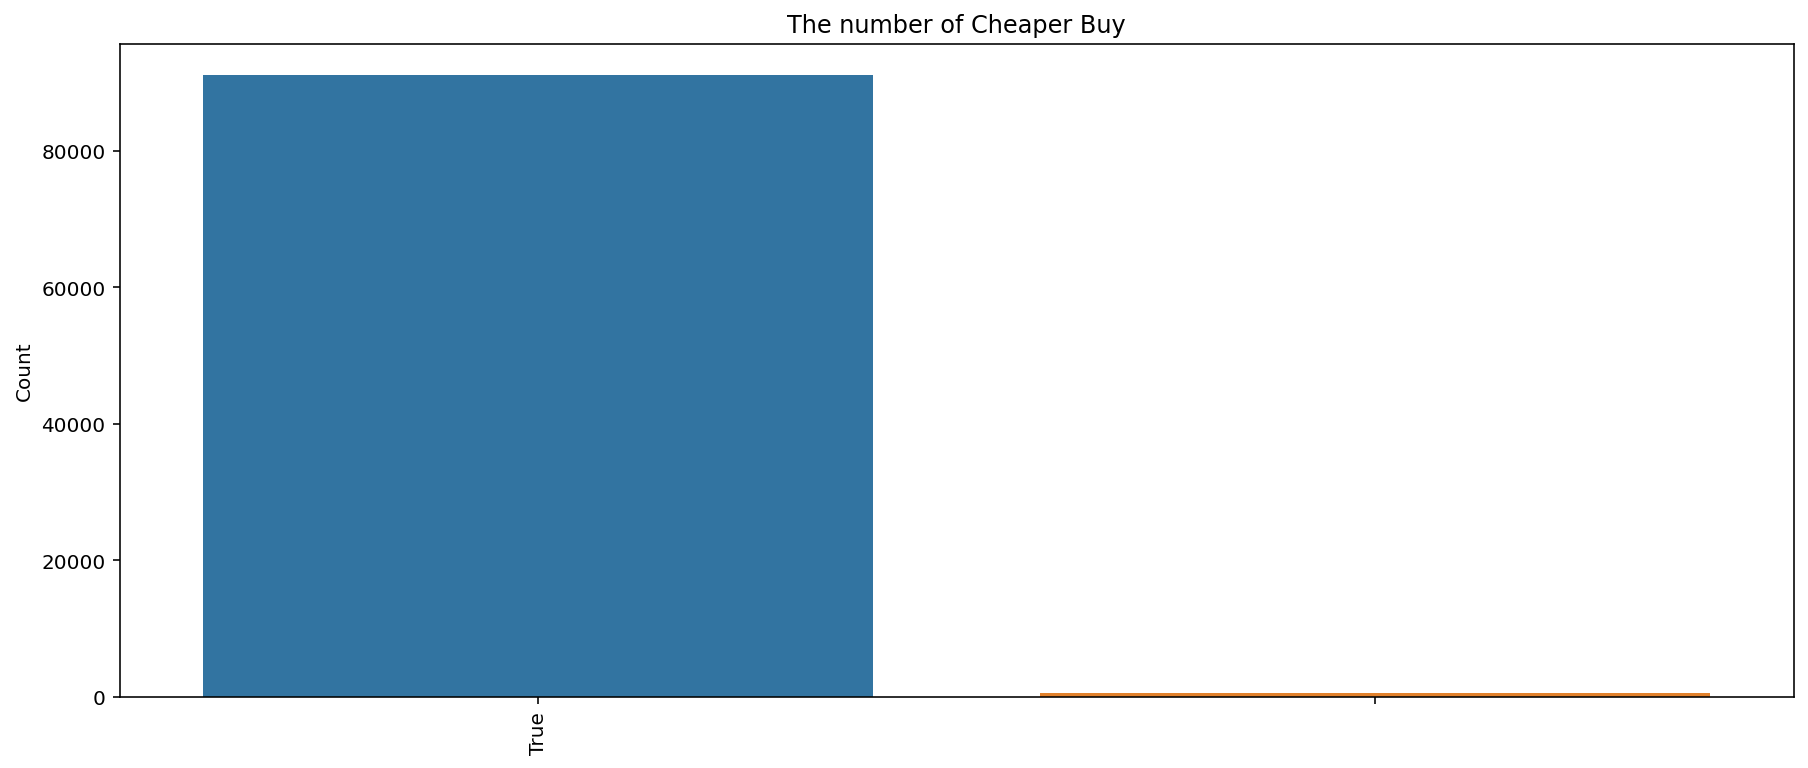

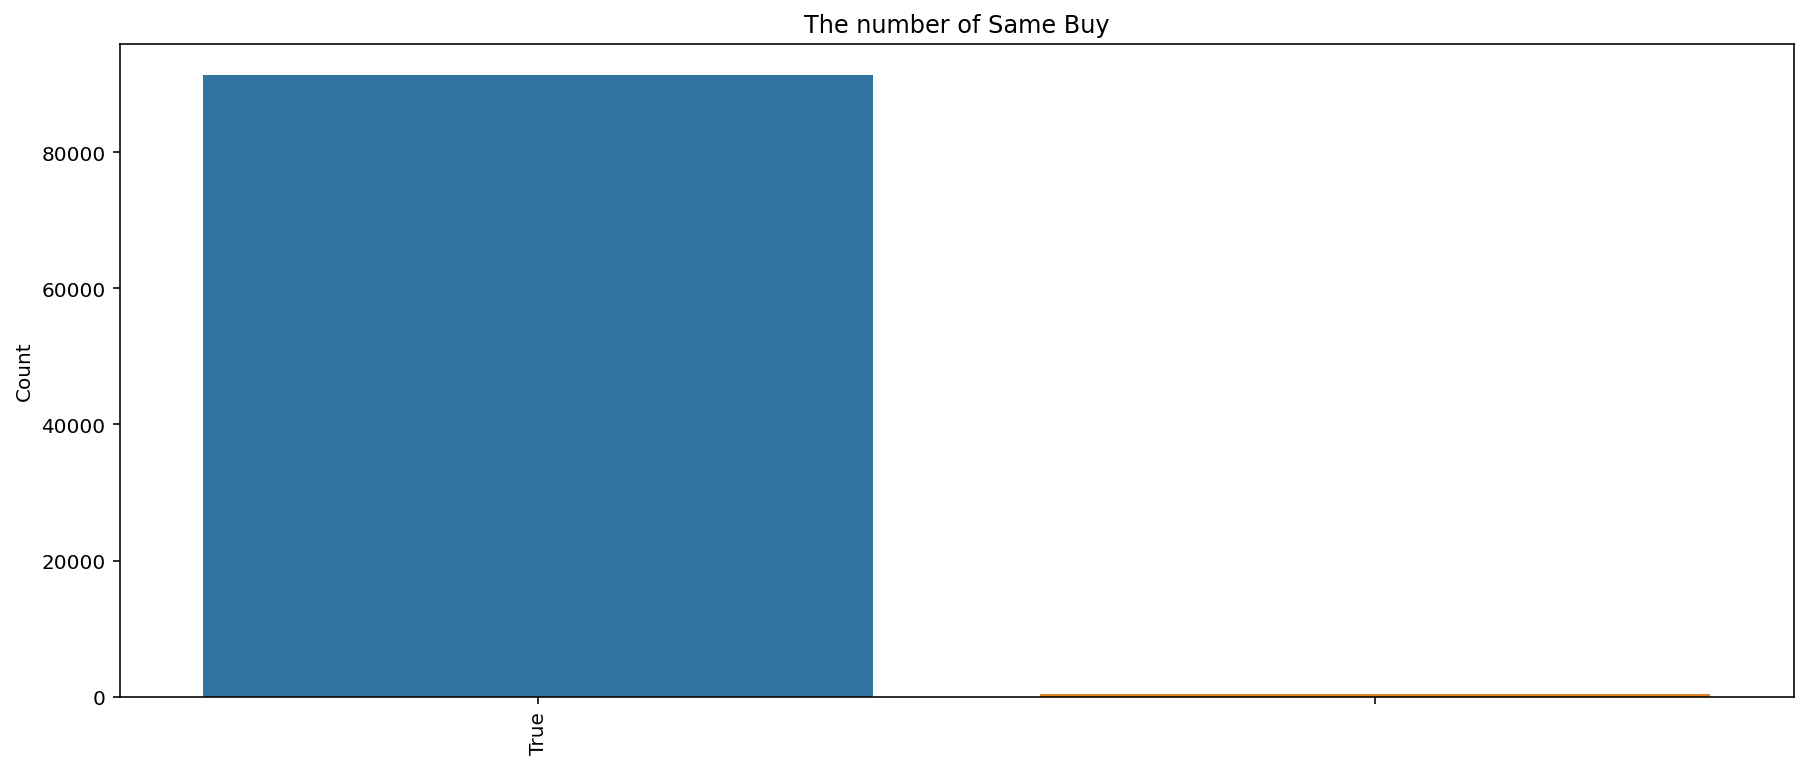

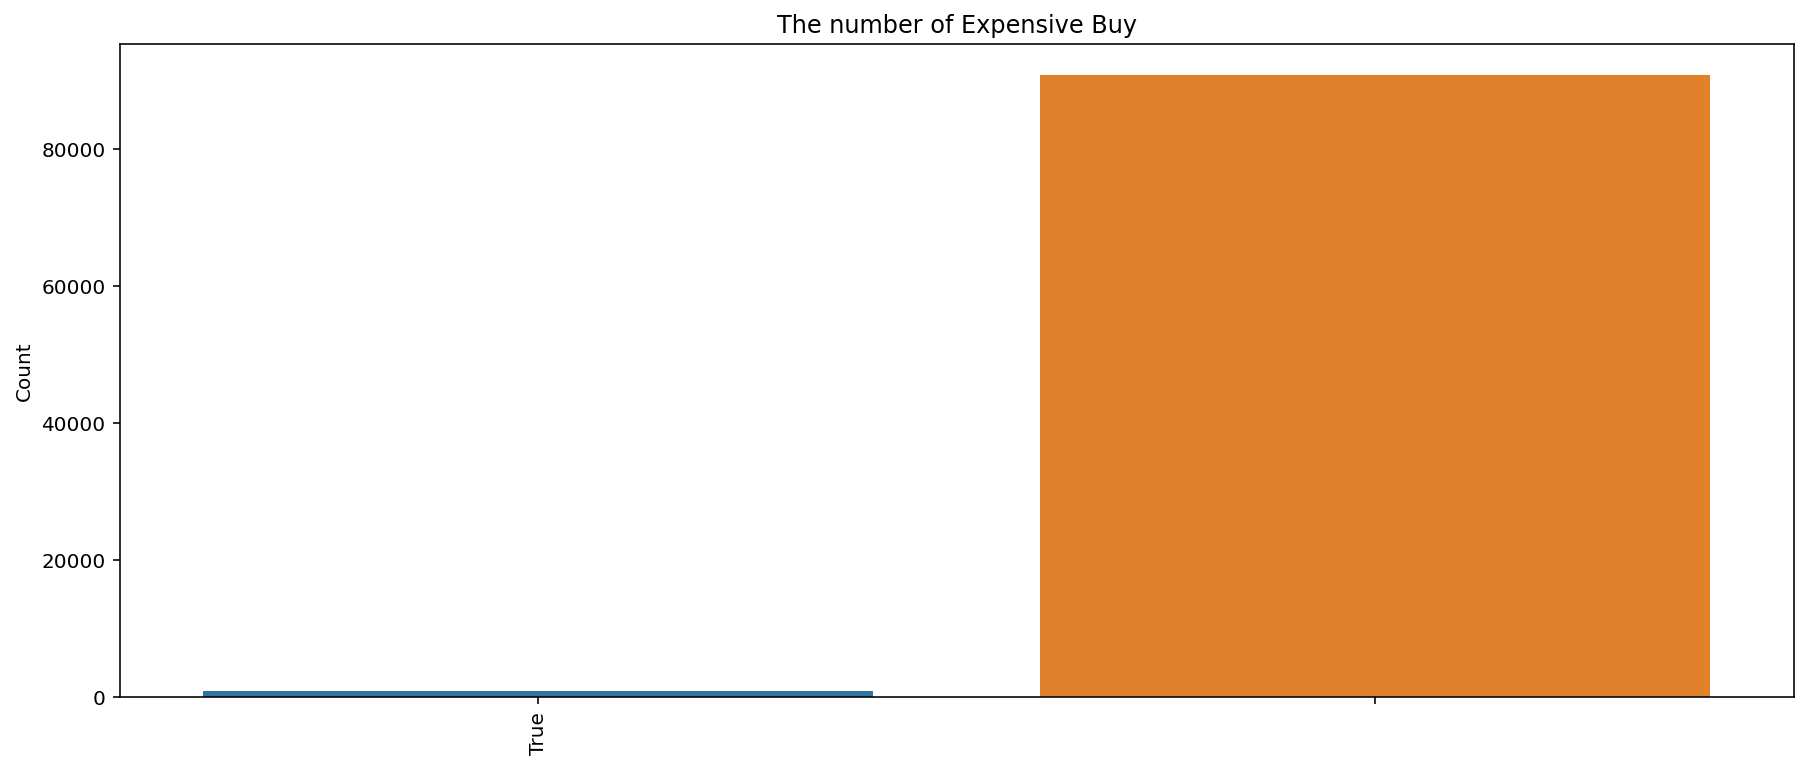

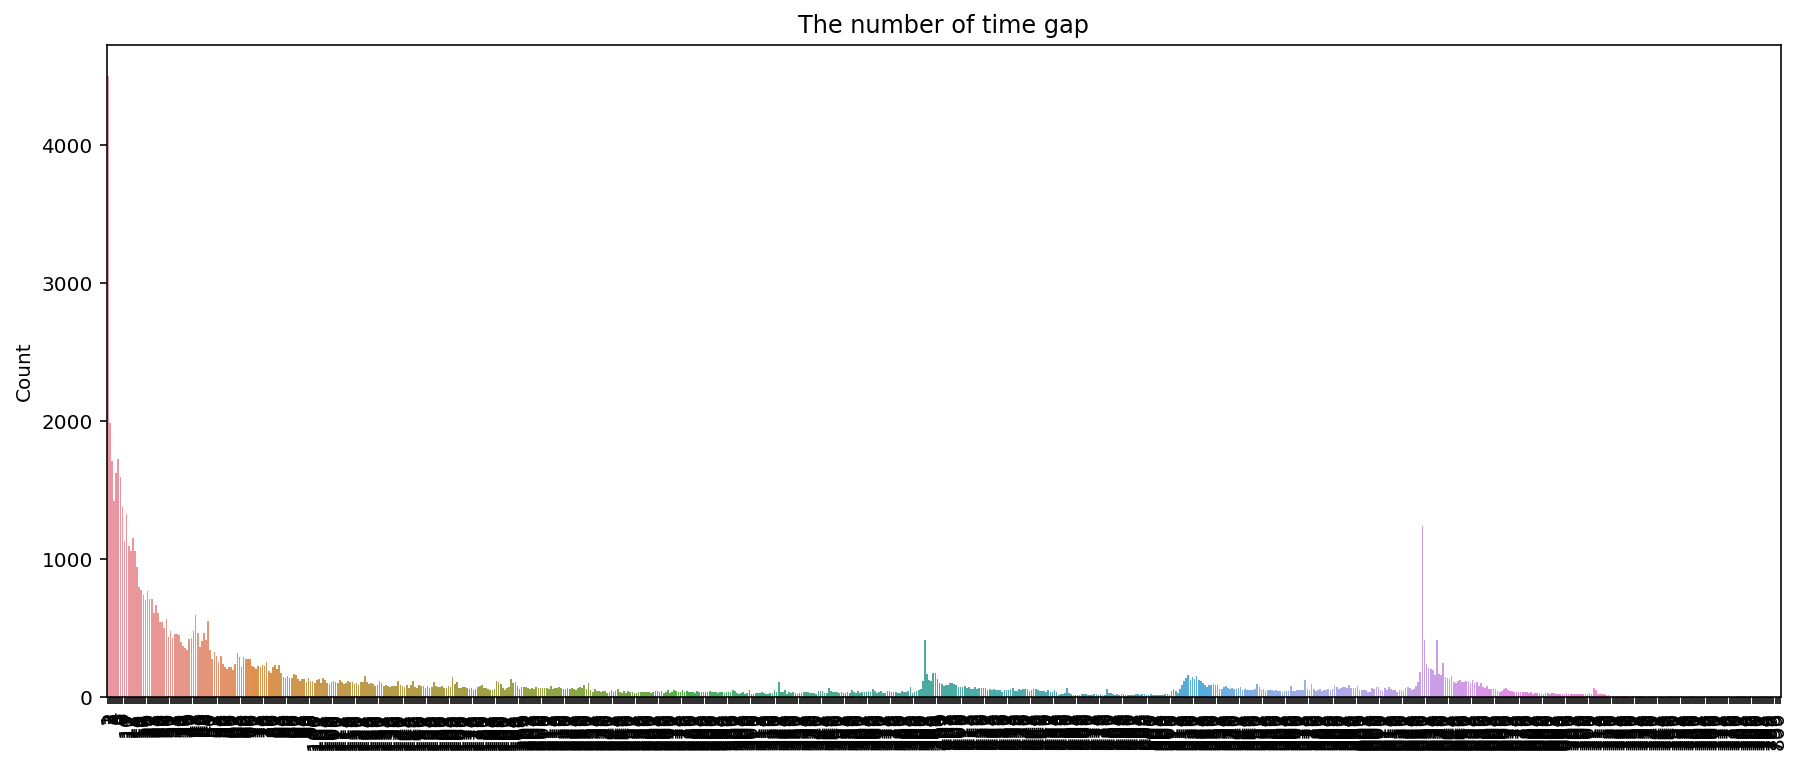

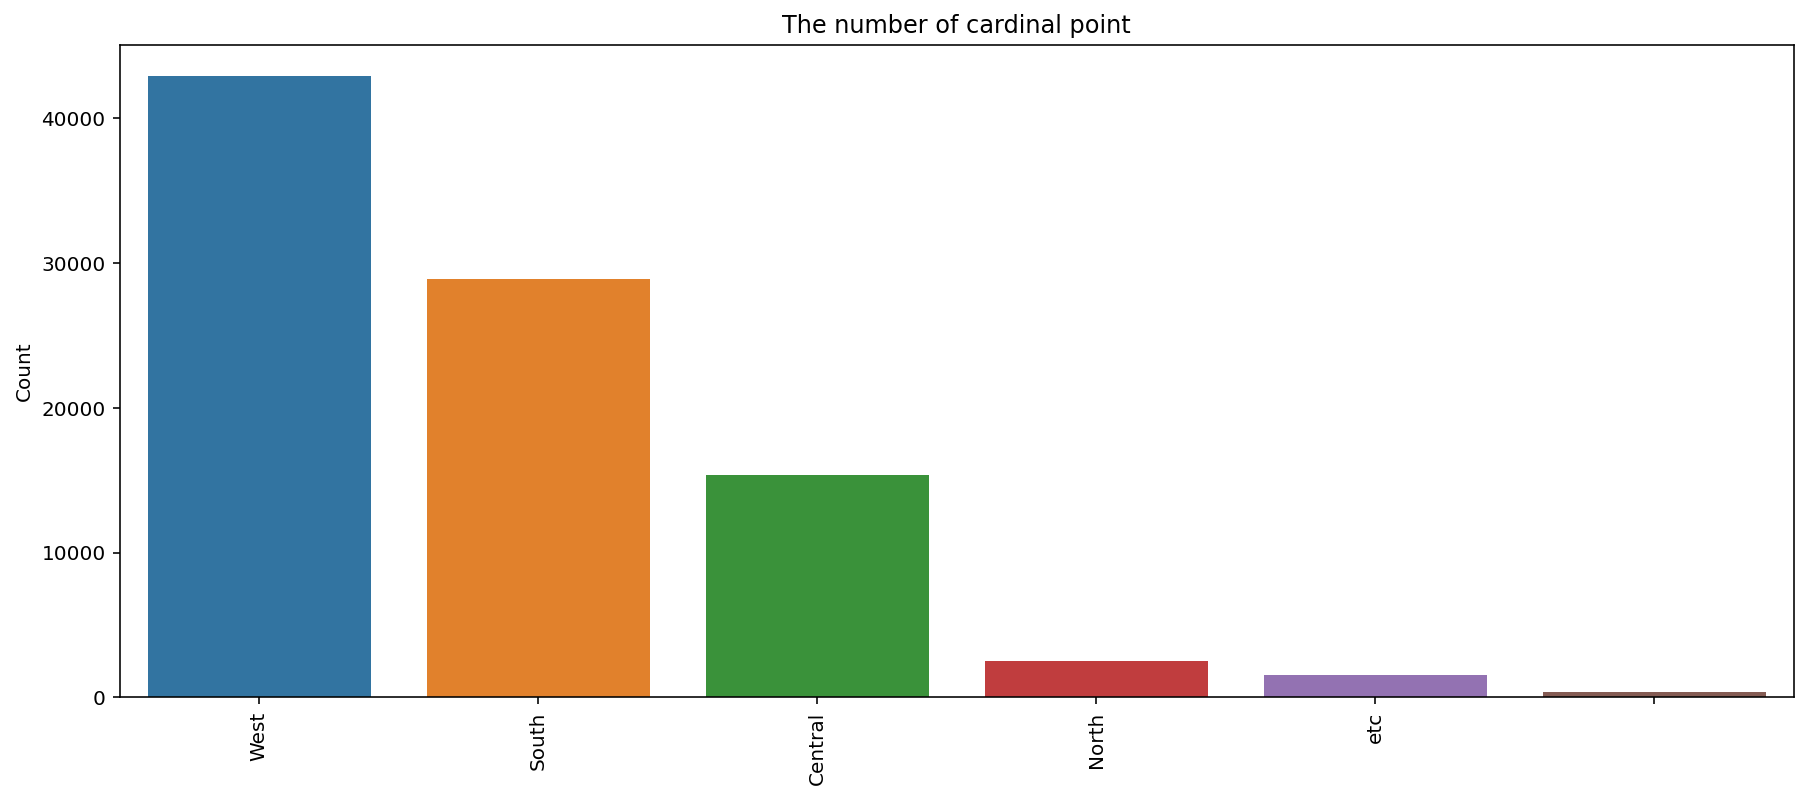

In [70]:
for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

# EDA
* 추후 인치 및 달러 전환할 필요 있을까

## 이름이 같은 제품의 평균 판매 가격 + (평균 소매 가격 + 팔릴 때까지의 평균 time gap + 최빈 지역?)

In [71]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return'],
      dtype='object')

In [72]:
# bruh = df[['Sneaker Name', 'Sale Price','Retail Price','time gap','cardinal point']]
bruh = df[['Sneaker Name', 'Sale Price','cardinal point']]
bruh.head()

,Sneaker Name,Sale Price,cardinal point
0,Adidas Yeezy Boost 350 V2 Core Black Copper,685,West
1,Adidas Yeezy Boost 350 V2 Core Black Green,690,West
2,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,East
3,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,East
4,Adidas Yeezy Boost 350 V2 Core Black White,784,West


## 상품 평균가격
* Test 데이터에 나와있는 상품명에 맞게 변경?

In [73]:
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]

In [74]:
avgs_price=[]

for name in sneakernames:
  shoerow = bruh.loc[bruh['Sneaker Name']==name]
  avgs_price.append(shoerow.mean()[0])

AvgPrice = pd.Series(avgs_price)
SneakerName = pd.Series(sneakernames)

avgprice_df = pd.DataFrame(columns=['Sneaker_Name','Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

avgprice_df.head()

,Sneaker_Name,Average_Price
0,adidas Yeezy Boost 350 V2 Butter,266.683213
1,Adidas Yeezy Boost 350 V2 Beluga 2pt0,396.413838
2,Adidas Yeezy Boost 350 V2 Zebra,361.272206
3,Adidas Yeezy Boost 350 V2 Blue Tint,378.082225
4,Adidas Yeezy Boost 350 V2 Cream White,288.708805


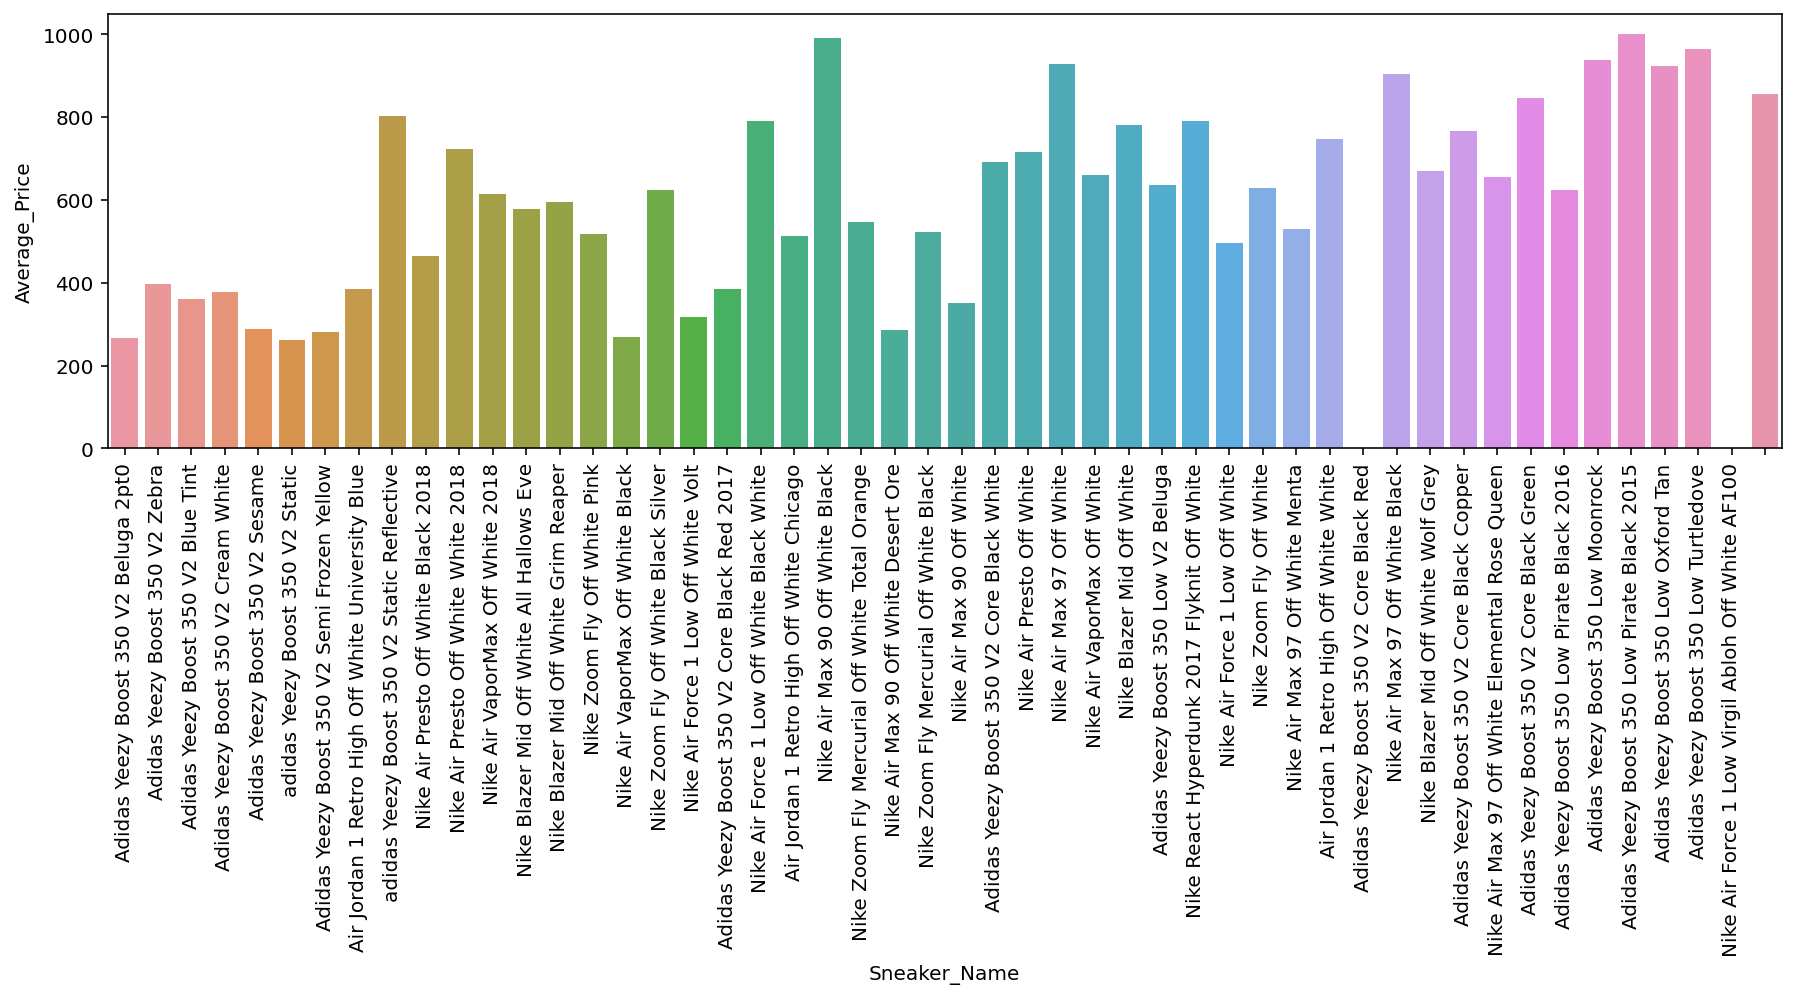

In [75]:
fig_dims = (15,4)
fig,ax = plt.subplots(figsize = fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'], y=avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

## 브랜드 평균 가격

In [76]:
avgs_price2 =[]
target_df = df[['Brand','Sale Price']]
brands = [' Yeezy','Off-White']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

 Yeezy average price : $353.28518443687585
Off-White average price : $573.0297797910033


In [77]:
target_df.head()

,Brand,Sale Price
0,Yeezy,685
1,Yeezy,690
2,Yeezy,828
3,Yeezy,798
4,Yeezy,784


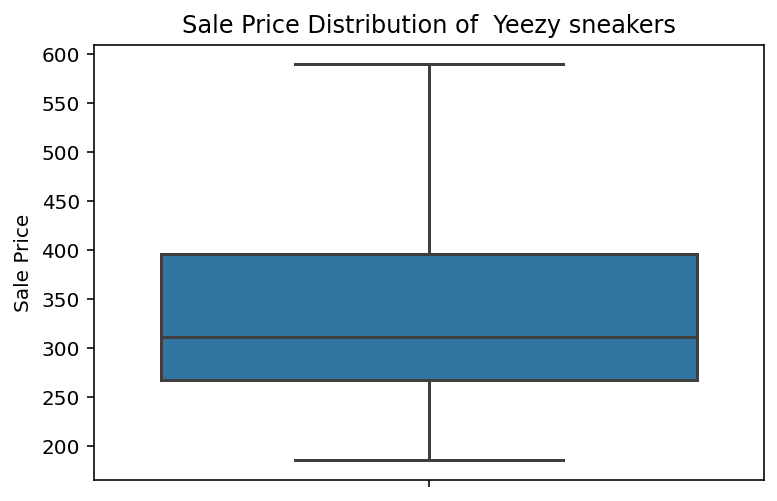

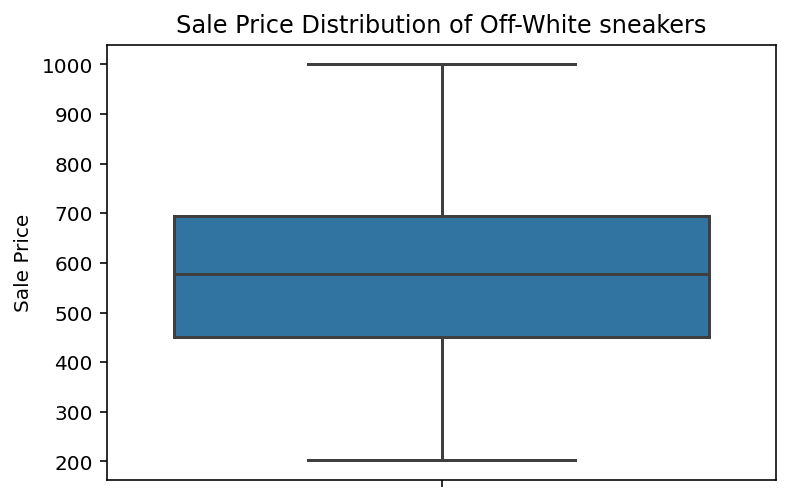

In [78]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

## 트랜드 분석 : 판매가와 주문일

In [79]:
target_df = df[['Order Date', 'Sale Price']]
# ndarray 형태의 unique 를 list형태로
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avgs_price3 = []

for date in uniq_ord_dates:
  daterow = target_df[target_df['Order Date']==str(date)]
  avgs_price3.append(daterow['Sale Price'].mean())
  
uniq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avgs_price3)
dateprice_df = pd.DataFrame(columns=['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = uniq_dates.sort_values(ascending=True)
dateprice_df['Average_Price']=date_avgs
dateprice_df.head()


,Order_date,Average_Price
474,2017-09-01,611.761905
496,2017-09-02,649.600000
503,2017-09-03,614.000000
490,2017-09-04,623.764706
473,2017-09-05,624.333333


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

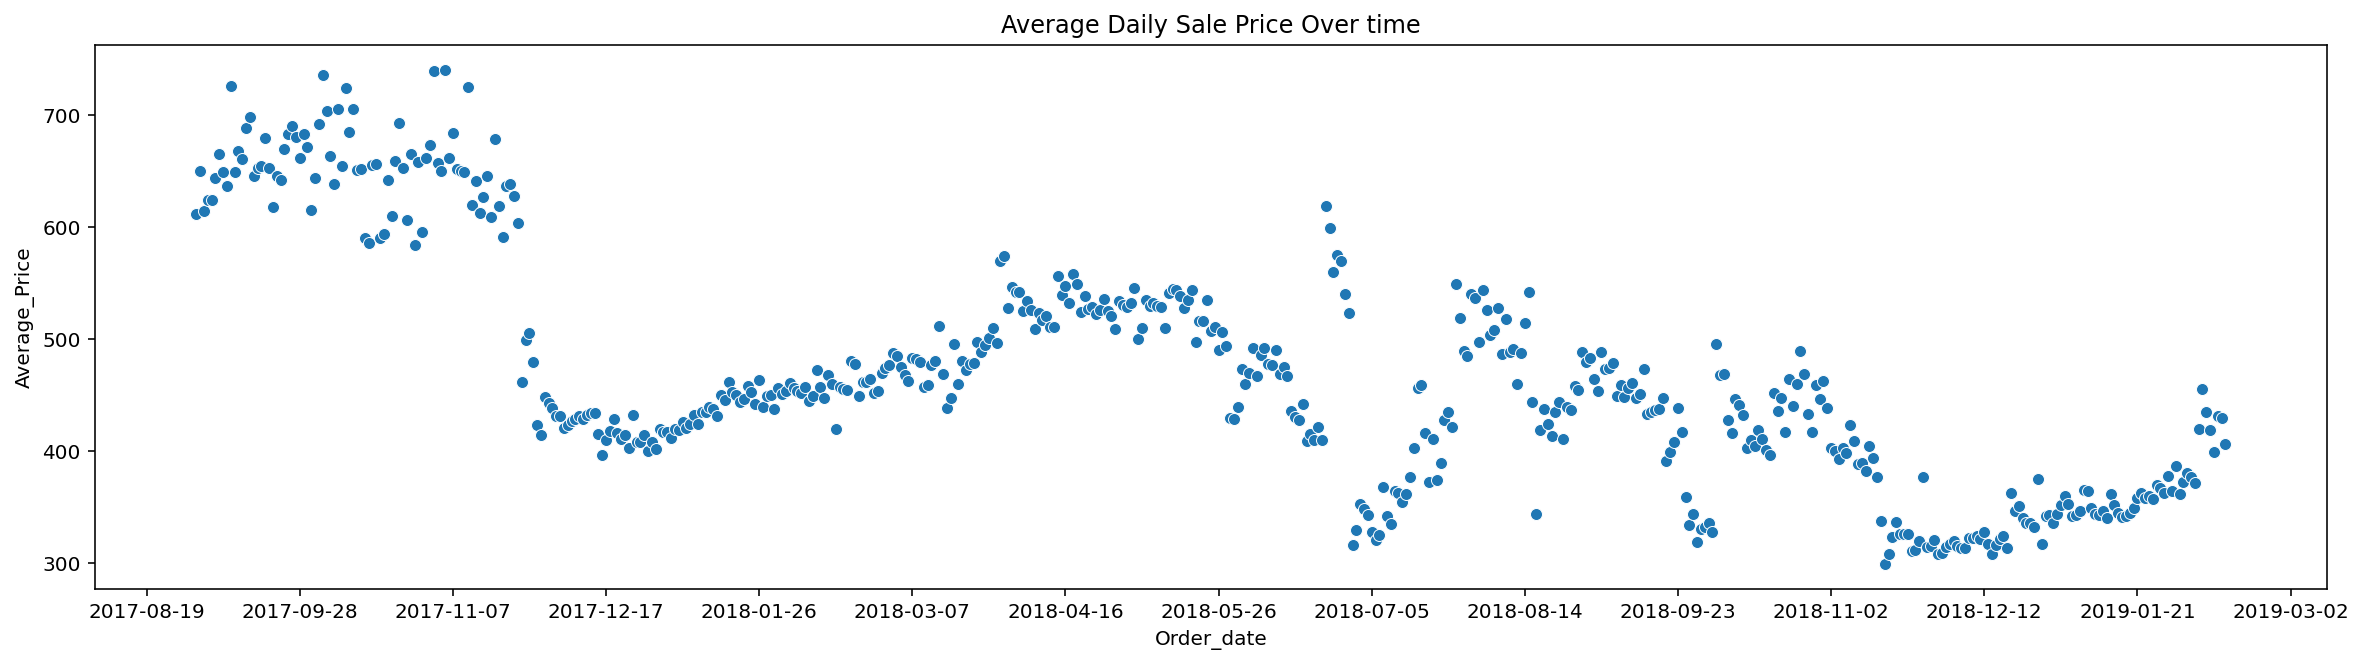

In [80]:
# 주문일 기준 시간에 따른 평균가격 변화 

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date",y="Average_Price",data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

33


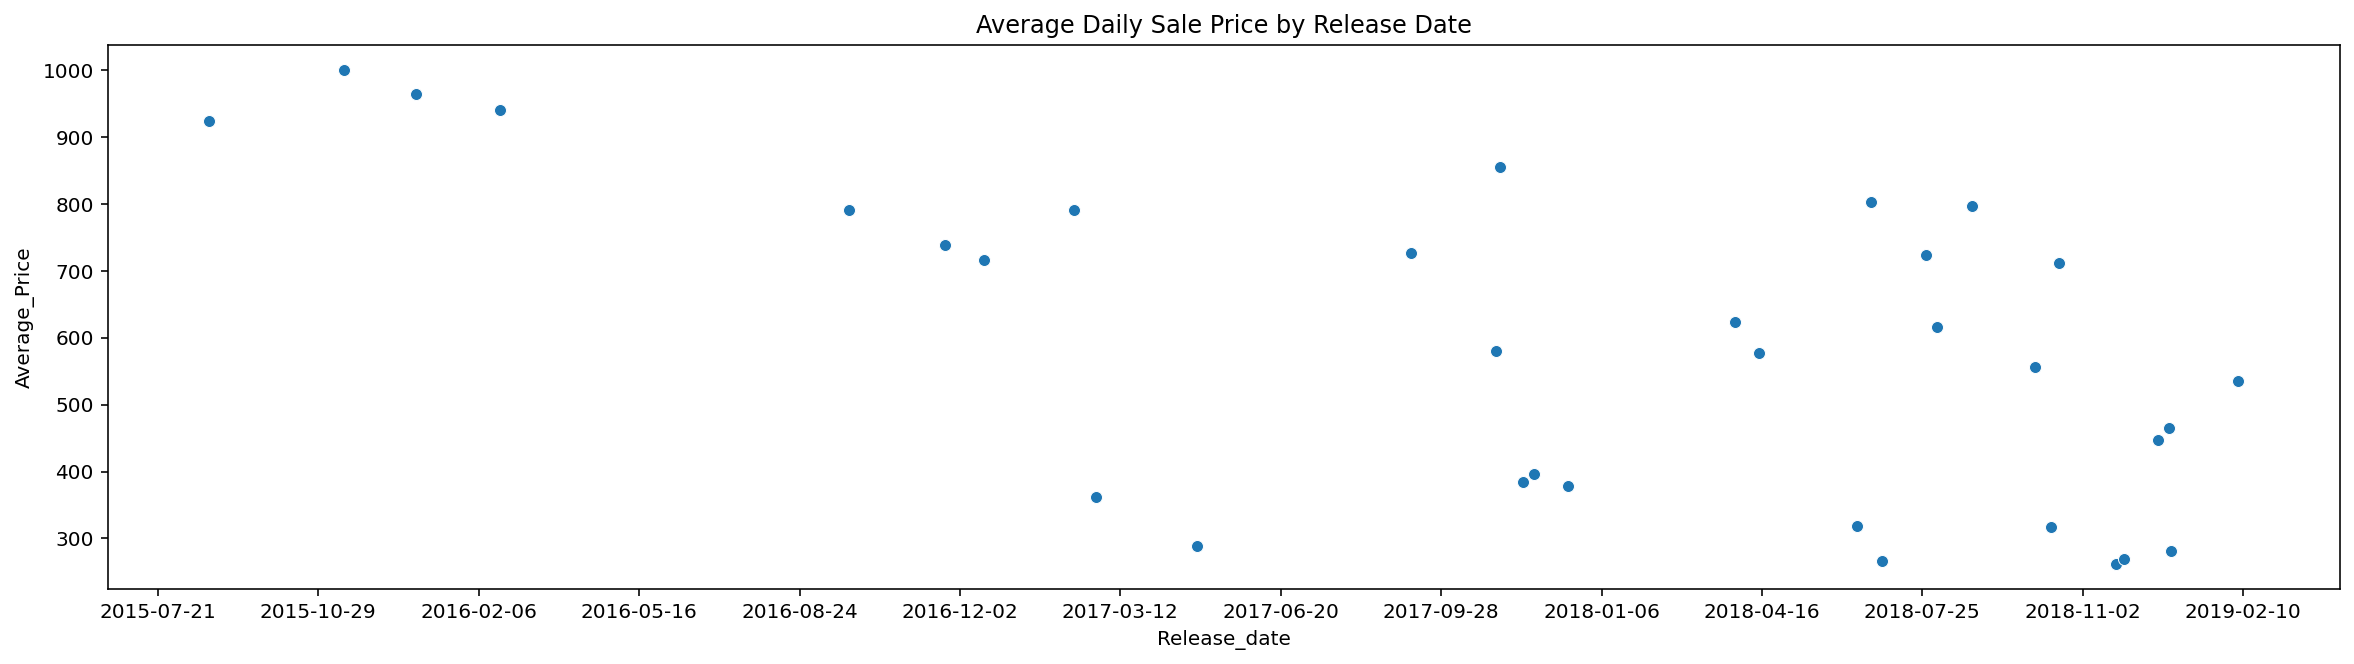

In [81]:
# 출시일 기준 시간에 따른 평균가격 변화 (확인 결과 출시일 고유값이 35개 뿐임)

target_df = df[['Release Date','Sale Price']]
uniq_rel = target_df['Release Date'].unique()
avgprice=[]

for uni in uniq_rel:
  daterow = target_df.loc[target_df['Release Date']== uni]
  avgprice.append(daterow['Sale Price'].mean())

Date = pd.Series(uniq_rel)
avgPrice = pd.Series(avgprice)
print(len(avgPrice))
rel_dateprice_df = pd.DataFrame(columns=['Release_date','Average_Price'])
rel_dateprice_df['Release_date'] = Date.sort_values(ascending=True)
rel_dateprice_df['Average_Price'] = avgPrice

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Release_date",y="Average_Price",data=rel_dateprice_df)
chart.set_title("Average Daily Sale Price by Release Date")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))

## 트랜드 분석 : 구매자 지역과 판매 가격 비교

In [82]:
target_df = df[['Buyer Region','Sale Price']]
uniq_region = df['Buyer Region'].value_counts().index.tolist()
avg_price = []

for region in uniq_region:
  region_row = target_df.loc[target_df['Buyer Region']==region]
  avg_price.append(region_row['Sale Price'].mean())

region_col = pd.Series(uniq_region)
avgprice_col = pd.Series(avg_price)

regionprice_df = pd.DataFrame(columns=['Buyer Region','Average Price'])
regionprice_df['Buyer Region'] = region_col
regionprice_df['Average Price'] = avgprice_col
regionprice_df.head().sort_values('Average Price',ascending=True)

,Buyer Region,Average Price
4,Texas,387.705549
3,Florida,401.120249
1,New York,405.364914
0,California,426.044155
2,Oregon,429.603267


Text(0.5, 1.0, 'Average Sale Price by Buyer Region')

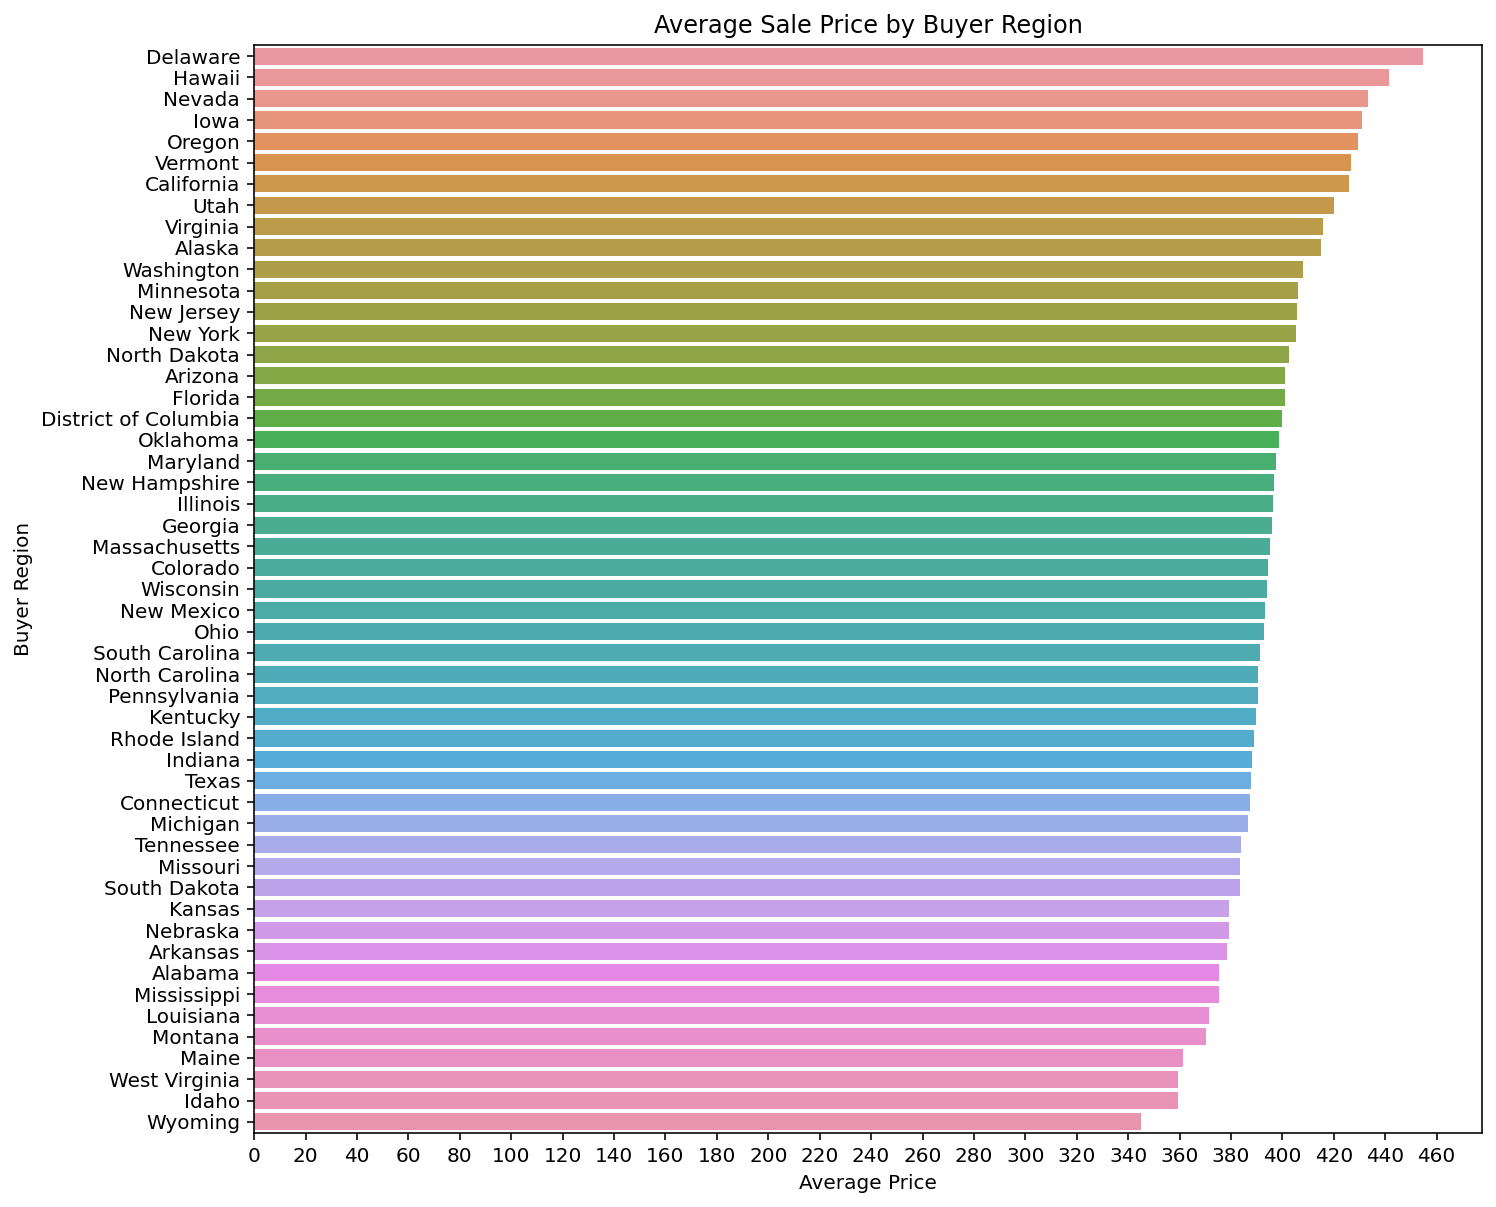

In [83]:
fig,ax = plt.subplots(figsize=(11,10))
chart = sns.barplot(x='Average Price',y='Buyer Region',data=regionprice_df.sort_values('Average Price',ascending=False))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
chart.set_title("Average Sale Price by Buyer Region")

# Modeling
* 상품의 평균 가격 예측 
* train 데이터(df)의 브랜드, 신발 이름, (주문일-출시일), 소매가 => 판매가 예측 학습
* test 데이터(test_df2) 의 브랜드, 신발 이름, (현재날짜 - 출시일), 소매가 [입력] => 평균신발가격과 비슷한지 성능 평가

In [84]:
# 테스트 데이터 컬럼 필요한것만 남기는 작업
test2 = test.copy()
test2.drop(columns=['Unnamed: 0'],inplace=True)
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,354


In [85]:
df.head(1)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1


In [86]:
train_df = df.copy()
test_df = test_df2.copy()

## 머신러닝 모델링을 위한 전처리

In [87]:
train_df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return'],
      dtype='object')

### 컬럼명 변경

In [88]:
# 컬럼명 공백 제거

train_df = train_df.rename(columns={
    "Order Date":"Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region", 
    'Cheaper Buy': 'Cheaper_Buy',
    'Same Buy':'Same_Buy',
    'Expensive Buy':'Expensive_Buy',
    'time gap':'time_gap',
    'cardinal point':'cardinal_point'
    })
train_df.head(1)

,Order_date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1


In [89]:
test_df = test_df.rename(columns={
    'retail Price':'Retail_Price',
    'Release Date':'Release_Date',
    '평균신발가격':'Average_Price'
})
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188


In [90]:
# 날짜 데이터 -> 수치형 데이터 전환
import datetime as dt

train_df['Order_date'] = pd.to_datetime(train_df['Order_date'])
train_df['Order_date']=train_df['Order_date'].map(dt.datetime.toordinal)

train_df['Release_Date'] = pd.to_datetime(train_df['Release_Date'])
train_df['Release_Date']=train_df['Release_Date'].map(dt.datetime.toordinal)

train_df['time_gap']=train_df['Order_date']-train_df['Release_Date']

In [91]:
# 데이터 수집일자 컬럼 추가
Crowling_Data = ['2022-06-15']*len(test_df)
test_df['Crowling_Data']=Crowling_Data
test_df['Crowling_Data'] = pd.to_datetime(test_df['Crowling_Data'],format='%Y-%m-%d')
test_df.dtypes

Sneaker_Name             object
Brand                    object
Retail_Price              int64
Release_Date             object
Average_Price             int64
Crowling_Data    datetime64[ns]
dtype: object

In [92]:
test_df['Release_Date'] = pd.to_datetime(test_df['Release_Date'])
test_df['Release_Date']=test_df['Release_Date'].map(dt.datetime.toordinal)

test_df['Crowling_Data']=test_df['Crowling_Data'].map(dt.datetime.toordinal)


# 수집일 - 출시일 = time gap 컬럼 생성
test_df['time_gap']=test_df['Crowling_Data']-test_df['Release_Date']
test_df.head(2)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4


### Target Feature 등 컬럼 제거 후 train/test set 분리

In [93]:
train_df.head(1)

,Order_date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return
0,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1


In [94]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

X = train_df.drop(['Sale_Price','Cheaper_Buy','Same_Buy','Expensive_Buy','cardinal_point','Buyer_Region','Shoe_Size','multiple_return'],axis=1)
y = train_df['Sale_Price']


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)


In [95]:
print(X.shape)

(91589, 6)


In [96]:
# 신발 이름에서 공백을 기준으로 split한 컬럼들을 인코딩하면 모델 성능이 올라가지않을까?
X['Sneaker_Name']

0          Adidas Yeezy Boost 350 V2 Core Black Copper
1           Adidas Yeezy Boost 350 V2 Core Black Green
2        Adidas Yeezy Boost 350 V2 Core Black Red 2017
3        Adidas Yeezy Boost 350 V2 Core Black Red 2017
4           Adidas Yeezy Boost 350 V2 Core Black White
                             ...                      
91584      adidas Yeezy Boost 350 V2 Static Reflective
91585      adidas Yeezy Boost 350 V2 Static Reflective
91586      adidas Yeezy Boost 350 V2 Static Reflective
91587      adidas Yeezy Boost 350 V2 Static Reflective
91588      adidas Yeezy Boost 350 V2 Static Reflective
Name: Sneaker_Name, Length: 91589, dtype: object

In [97]:
test_df['Sneaker_Name']

0                             adidas Yeezy Foam RNR Onyx
1                      Jordan 1 Retro High OG Visionaire
2                                Jordan 4 Retro Infrared
3               NikeCraft General Purpose Shoe Tom Sachs
4                      adidas Yeezy Boost 700 Hi-Res Red
                             ...                        
995    Nike Air Force 1 Low G-Dragon Peaceminusone Pa...
996              Jordan 1 Retro High Black Satin Gym Red
997                 Nike Air Max 90 Recraft Triple White
998                       adidas Yeezy Boost 350 V2 Fade
999          Nike SB Dunk High Supreme By Any Means Navy
Name: Sneaker_Name, Length: 1000, dtype: object

In [98]:
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,adidas,80,738314,188,738321,7


In [99]:
X_test = test_df.drop('Average_Price',axis=1)
y_test = test_df['Average_Price']

### Encoding

In [100]:
# 범주형 데이터 -> 수치형 데이터

from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name','Brand'] 


# 범주형 데이터를 가진 컬럼에 원핫인코딩 적용
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# 원핫인코딩 인덱스 제거 -> 인덱스 치환
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

OH_cols_test.index = X_test.index

# 원핫 인코딩 후 컬럼명 추가
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

OH_cols_test.columns = OH_encoder.get_feature_names(object_cols)

# train, validation 데이터셋에서 원핫인코딩한 컬럼들 삭제(수치형 Feature들만 존재)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

num_X_test = X_test.drop(object_cols, axis=1)

# 원핫인코딩한 결과 병합
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [101]:
OH_X_train.head(2)

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Black,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_ Yeezy,Brand_Off-White
7553,736675,220,736658,17,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54199,737014,220,736385,629,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 모델 적용

### Baseline - Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [103]:
# y절편 확인

print(lm.intercept_)

509016.67551170144


In [104]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
Release_Date,-222894.598296
time_gap,-222894.242870
Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,-288.955130
Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream White,-272.208880
Sneaker_Name_Nike Zoom Fly Off White Pink,-234.455058
Sneaker_Name_Nike Zoom Fly Mercurial Off White Black,-225.511827
Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,-218.643357
Sneaker_Name_Nike React Hyperdunk 2017 Flyknit Off White,-216.685329
Sneaker_Name_Nike Zoom Fly Off White,-208.881080
Sneaker_Name_Nike Zoom Fly Off White Black Silver,-201.851899


In [105]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))

MAE : 49.20745287897691
MSE : 5067.00085149282
RMSE : 71.18286908725175


In [106]:
# Test 데이터로 실제 테스트

pred = lm.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 175966720825.30838
MSE : 3.2702412461879207e+22
RMSE : 180838083549.56433


### Model1

### Model2

### Model3

### Model4

# 모델 피클링

In [107]:
import pickle

with open('baseline_model.pickle','wb') as fw:
  pickle.dump(lm,fw)